---
# Predictive Modeling of Pizza Sales: A Regression Analysis of Total Price


---

## Project Overview

### Introduction

The pizza sales dataset provides a detailed view of transactions over the course of 2015, capturing various attributes related to pizza sales. This project aims to explore the dataset using data analysis techniques to gain insights into customer preferences, sales trends, and category performance. By examining factors such as pizza types, sizes, ingredients, and order times, this analysis helps identify the most popular pizzas, peak sales periods, and potential areas for business improvement.

### Synopsis
This project involves analyzing a dataset containing **48,620 pizza orders**, spanning various categories such as **Classic, Veggie, Supreme, and Chicken pizzas.** Key variables in the dataset include **pizza name, size, category, ingredients, price, and time of order.** The analysis covers multiple aspects:

**Pizza Category Distribution**:

The dataset is categorized into four primary types, with Classic pizzas being the most ordered.

**Most Sold Pizzas**: 

Specific pizzas such as "The Big Meat Pizza" and "The Barbecue Chicken Pizza" dominate sales.

**Peak Ordering Times**:

An in-depth exploration of peak hours, especially focusing on the period between 12 PM and 1 PM.

**Order Trends**: 

Insights on sales behavior across different seasons and days, identifying high-demand periods.

**Price Analysis**: 

Analysis of unit and total prices across different pizza types, sizes, and order quantities.
The project concludes with visualizations of pizza sales trends and recommendations for inventory and marketing strategies based on observed patterns in the dataset.

## Preparing Data

The following code utilizes the Python pandas library to load a dataset sourced from Kaggle for analysis.

In [1]:
import pandas as pd
import numpy as np
pizza_data= pd.read_csv('C:/Users/Collins PC/Downloads/pizza_sales.csv')
pizza_data.head()


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


This code provides an overview of the pizza sales dataset by displaying its structure and key attributes. Using the pandas library in Python, the dataset is loaded and the info() function is used to inspect its composition. The dataset contains 48,620 entries and 12 columns, with a mix of numerical and categorical data. Key columns include pizza-specific information such as pizza_name, pizza_size, pizza_category, and financial details like unit_price and total_price.

The output reveals that the dataset is complete, with no missing values in any of the columns. The data types consist of five numerical fields (float64) and seven categorical fields (object), and the dataset consumes 4.5 MB of memory. This preliminary analysis sets the foundation for deeper exploration, particularly for the regression model aimed at predicting total price.

In [2]:
pizza_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [3]:
pizza_data.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [4]:
pizza_data.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

This code snippet generates a bar plot to visualize the distribution of pizza categories in the dataset. By using the value_counts() function, the code counts the occurrences of each unique category in the pizza_category column, and then plots these counts as a bar chart using the matplotlib library. The colors of the bars are customized to alternate between red and blue.
The output is a bar chart that visually represents the frequency of each pizza category. According to the dataset, the categories include:

Classic (14,579 entries)
Supreme (11,777 entries)
Veggie (11,449 entries)
Chicken (10,815 entries)

<Axes: xlabel='pizza_category'>

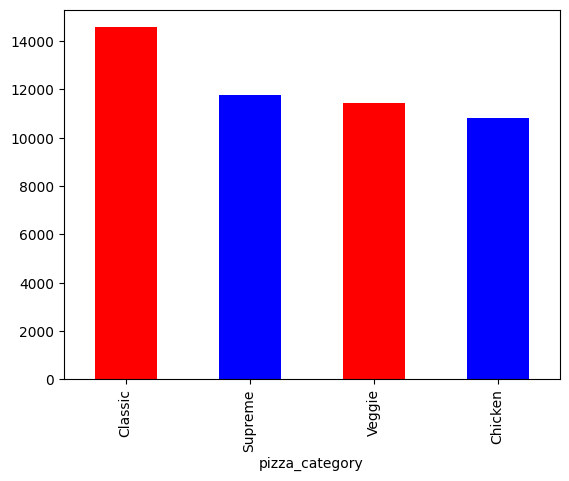

In [5]:
pizza_data['pizza_category'].value_counts().plot(kind='bar', color=['red', 'blue'])

In [6]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

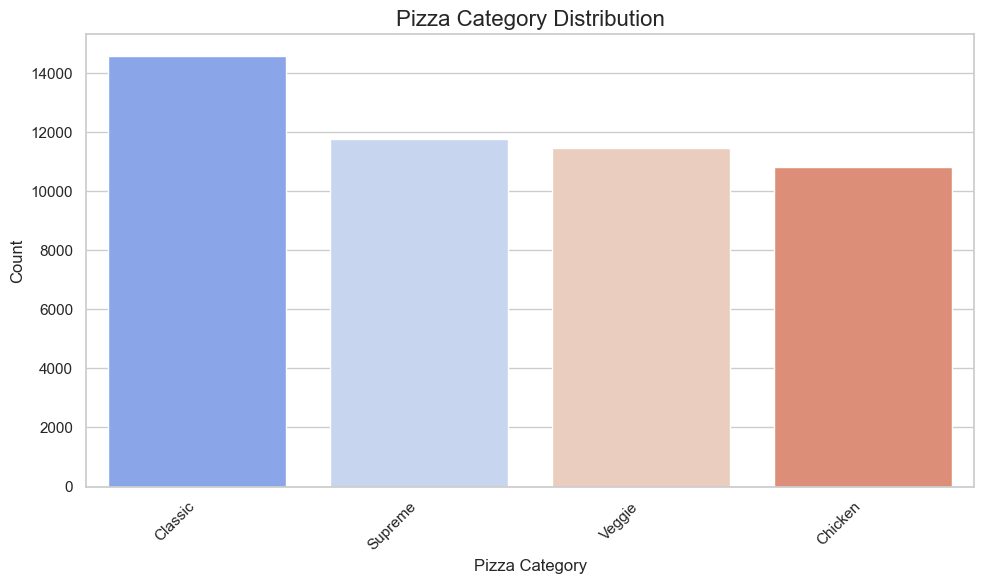

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot to improve aesthetics
sns.set(style="whitegrid")

# Get the value counts of the 'pizza_category' column
pizza_category_counts = pizza_data['pizza_category'].value_counts()

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
sns.barplot(x=pizza_category_counts.index, y=pizza_category_counts.values, palette='coolwarm')

# Customize the plot further
plt.title('Pizza Category Distribution', fontsize=16)
plt.xlabel('Pizza Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cut-off

# Show the plot
plt.show()


In [8]:
pizza_category_counts

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

In [9]:
# Count occurrences of each pizza category
category_counts = pizza_data['pizza_category'].value_counts()


# filter categories that have more than 10 occurrences
pizza_count = pizza_data[pizza_data['pizza_category'].isin(category_counts[category_counts > 10].index)]
pizza_count


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616.0,21348.0,ckn_alfredo_m,1.0,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617.0,21348.0,four_cheese_l,1.0,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618.0,21348.0,napolitana_s,1.0,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619.0,21349.0,mexicana_l,1.0,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [10]:
pizza_count.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [11]:
pizza_data.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

---
## Understanding the data
---

This code systematically categorizes the columns of the pizza sales dataset into categorical and numerical features. It first creates a list of all columns in the dataset, then iterates through each one to identify whether the column contains categorical (non-numerical) or numerical data based on its data type.

For each column, the code retrieves the unique values, counts them, and prints the details. The output also includes a final list of categorical and numerical features.

Key Actions:
Categorical Features: Columns containing data types such as text (e.g., pizza names, categories, ingredients) are classified as categorical.
Numerical Features: Columns with numeric data types (e.g., prices, quantities, IDs) are classified as numerical.
This classification step is essential for later data processing tasks such as encoding categorical variables for machine learning models, performing summary statistics, or visualizing data based on its type. It aids in preparing the data for analysis, including building the regression model to predict the total price.

In [12]:
col = list(pizza_data.columns)
categorical_features = []
numerical_features = []

for i in col:
    categorical_features = pizza_data.select_dtypes(include=['object']).columns.tolist()
    unique_values = pizza_data[i].unique()
    if i in categorical_features :
        categorical_features.append(i)
    else:
        numerical_features.append(i)
    
    print(f"Column: {i}")
    print(f"Unique Values ({len(unique_values)}): {unique_values}")
    print("-" * 50)

print('Categorical Features:', *categorical_features)
print('Numerical Features:', *numerical_features)


Column: pizza_id
Unique Values (48620): [1.0000e+00 2.0000e+00 3.0000e+00 ... 4.8618e+04 4.8619e+04 4.8620e+04]
--------------------------------------------------
Column: order_id
Unique Values (21350): [1.0000e+00 2.0000e+00 3.0000e+00 ... 2.1348e+04 2.1349e+04 2.1350e+04]
--------------------------------------------------
Column: pizza_name_id
Unique Values (91): ['hawaiian_m' 'classic_dlx_m' 'five_cheese_l' 'ital_supr_l' 'mexicana_m'
 'thai_ckn_l' 'ital_supr_m' 'prsc_argla_l' 'bbq_ckn_s' 'the_greek_s'
 'spinach_supr_s' 'classic_dlx_s' 'green_garden_s' 'ital_cpcllo_l'
 'ital_supr_s' 'mexicana_s' 'spicy_ital_l' 'spin_pesto_l' 'veggie_veg_s'
 'mexicana_l' 'southw_ckn_l' 'bbq_ckn_l' 'cali_ckn_l' 'cali_ckn_m'
 'pepperoni_l' 'cali_ckn_s' 'ckn_pesto_l' 'big_meat_s' 'soppressata_l'
 'four_cheese_l' 'napolitana_s' 'calabrese_m' 'four_cheese_m'
 'ital_veggie_s' 'mediterraneo_m' 'peppr_salami_s' 'spinach_fet_l'
 'napolitana_l' 'sicilian_l' 'ital_cpcllo_m' 'southw_ckn_s' 'bbq_ckn_m'
 'pepperoni

In [13]:
# Select only the categorical columns
categorical_data = pizza_data[categorical_features]

# statistics about categorical data 
description = categorical_data.describe()

description

# printing more details specific to categorical data:
for column in categorical_features:
    print(f"\nUnique values in {column}:")
    print(pizza_data[column].value_counts())


Unique values in pizza_name_id:
pizza_name_id
big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: count, Length: 91, dtype: int64

Unique values in order_date:
order_date
26-11-2015    261
27-11-2015    259
15-10-2015    258
4/7/2015      233
3/7/2015      207
             ... 
27-12-2015     87
22-11-2015     82
29-12-2015     77
22-03-2015     76
30-12-2015     73
Name: count, Length: 358, dtype: int64

Unique values in order_time:
order_time
12:32:00    26
11:59:10    24
12:53:29    23
12:52:36    23
12:26:04    23
            ..
12:32:48     1
22:04:30     1
20:35:35     1
12:43:50     1
22:09:54     1
Name: count, Length: 16382, dtype: int64

Unique values in pizza_size:
pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

Uniq

This output provides a comprehensive breakdown of the unique values within each column of the pizza sales dataset, helping categorize the data into numerical and categorical features. Below is a summary of key columns and their contents:

1. **Numerical Features**:
   
**pizza_id**: 

Unique identifier for each pizza, with 48,620 distinct values.
order_id: 

Represents individual orders, with 21,350 unique values.
quantity: 

The number of pizzas per order, with values ranging from 1 to 4.
unit_price: 

The price per pizza, ranging between  9.75USD and  35.95USD across 25 unique values.

**total_price**: 

Total price per order, with 56 unique values, ranging from 9.75USD to 83USD.

2. **Categorical Features**:
   
**pizza_name_id**:

Contains 91 unique pizza names (e.g., hawaiian_m, classic_dlx_m).

**order_date**: 

Covers 358 unique dates from January 1, 2015, to December 31, 2015.

**order_time**: 

Tracks the exact order time with 16,382 unique timestamps, with most frequent orders around noon.

**pizza_size**: 

Includes five sizes (M, L, S, XL, XXL), with size 'L' being the most common.

**pizza_category**: 

Four primary categories—Classic, Veggie, Supreme, and Chicken—with Classic being the most popular.

**pizza_ingredients**: 

Features 32 unique combinations of pizza ingredients (e.g., Pepperoni, Mushrooms, Red Onions).

**pizza_name**: 

Contains 32 unique pizza names (e.g., The Hawaiian Pizza, The Big Meat Pizza), with "The Classic Deluxe Pizza" being the most frequent.

**Insights**:

The dataset shows diverse pizza types and ingredient combinations, offering rich information for predicting pricing and customer preferences.
Most orders involve medium and large pizzas, with Classic pizzas being the top choice.
The analysis of unique order times suggests peak ordering periods around lunch hours, which could guide operational planning.
This summary helps outline the structure of the data, providing clarity for further analysis, including building a regression model for price prediction.








---
## Summary Statistics
---

In [14]:
pizza_data.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


This output provides the descriptive statistics for five key numerical columns in the pizza sales dataset: pizza_id, order_id, quantity, unit_price, and total_price. Below is a summary of each metric:

1. **pizza_id**:

**Count**: 

48,620 unique pizza IDs, matching the number of rows in the dataset.

**Mean**: 

The average pizza ID is 24,310.5, reflecting a midpoint in the unique identifiers.

**Min/Max**: 

The IDs range from 1 to 48,620, indicating no missing or irregular values.

2. **order_id**:
   
**Count**: 

48,620 unique entries with 21,350 distinct orders.

**Mean**: 

The average order ID is 10,701.48, suggesting a balanced distribution of orders.

**Min/Max**: 

Order IDs range from 1 to 21,350, covering a large number of transactions.

4. quantity:

**Mean**: 

The average number of pizzas per order is 1.02, indicating that most orders consist of a single pizza.

**Min/Max**: 

Quantity values range from 1 to 4 pizzas per order, with single pizza orders being the most common.
 **25% 50% 75%**: **75% of orders contain just 1 pizza**.

6. **unit_price**:

**Mean**: The average price per pizza is $16.49.

**Min/Max**: Prices range from 9.75 to 35.95, covering various pizza types and sizes.

**25% 50% 75%**: Most pizzas are priced between 12.75 and 20.25, with a median price of $16.50.

7. **total_price**:

**Mean**: The average total price for an order is $16.82, slightly higher than the unit price, reflecting additional quantities in some orders.

**Min/Max**: The total price ranges from 9.75 to 83.00, indicating variation in the number of pizzas per order and their prices.

**25% 50% 75%**: 50% of orders have a total price of 16.50, while **75%**  are below 20.50.

**Insights**:

The dataset mainly consists of single pizza orders with an average price around $16.50.
There is a wide range in total prices, driven by variations in the number of pizzas per order and their unit prices.
The descriptive statistics help set the foundation for modeling the total price, especially in identifying common price ranges and variations.







In [15]:
categorical_data.describe()

,pizza_name_id,order_date,order_time,pizza_size,pizza_category,pizza_ingredients,pizza_name,pizza_name
count,48620,48620,48620,48620,48620,48620,48620,48620
unique,91,358,16382,5,4,32,32,32
top,big_meat_s,26-11-2015,12:32:00,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,The Classic Deluxe Pizza
freq,1811,261,26,18526,14579,2416,2416,2416


This output provides descriptive statistics for the categorical columns in the pizza sales dataset: pizza_name_id, order_date, order_time, pizza_size, pizza_category, pizza_ingredients, and pizza_name. Below is a summary of the key findings:

1. **pizza_name_id**:

**Unique Values**: 

There are 91 unique pizza identifiers in the dataset.

**Most Frequent (top)**: 

The most ordered pizza is big_meat_s, with 1,811 occurrences.

3. **order_date**:
   
**Unique Values**: 

The dataset covers 358 unique dates.

**Most Frequent Date**: 

The highest number of orders occurred on November 26, 2015, with 261 orders recorded on this day.

5. **order_time**:

**Unique Values**: 

There are 16,382 unique order times.

**Most Frequent Time**: 

The most frequent order time is 12:32:00 PM, with 26 orders placed at this time.

6. **pizza_size**:

**Unique Values**: 

Five pizza sizes (S, M, L, XL, XXL) are present in the dataset.

**Most Frequent Size**: 

The most common size is Large (L), accounting for 18,526 orders.

7. **pizza_category**:

**Unique Values**: 

Four pizza categories (Classic, Veggie, Supreme, Chicken) are included.

**Most Frequent Category**: 

The "Classic" category is the most popular, with 14,579 orders.

8. **pizza_ingredients**:

**Unique Values**:

There are 32 unique combinations of pizza ingredients.

**Most Frequent Ingredients**:

The most common ingredient combination is Pepperoni, Mushrooms, Red Onions, Red Peppers, appearing in 2,416 orders.

9. **pizza_name**:

**Unique Values**: 

The dataset contains 32 unique pizza names.

**Most Frequent Name**: 

"The Classic Deluxe Pizza" is the most ordered pizza, with 2,416 occurrences.

**Insights | Value**:

The dataset features a diverse range of pizza types, with "The Classic Deluxe Pizza" being the most popular.

Large pizzas and the "Classic" category dominate the orders.

Orders peak around lunchtime (12:32 PM), and November 26, 2015, saw the highest order volume.

These descriptive statistics highlight key patterns and preferences in the pizza sales data, which can help with forecasting demand and identifying popular items.








In [16]:
categorical_data

,pizza_name_id,order_date,order_time,pizza_size,pizza_category,pizza_ingredients,pizza_name,pizza_name
0,hawaiian_m,1/1/2015,11:38:36,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,The Hawaiian Pizza
1,classic_dlx_m,1/1/2015,11:57:40,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,The Classic Deluxe Pizza
2,five_cheese_l,1/1/2015,11:57:40,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,The Five Cheese Pizza
3,ital_supr_l,1/1/2015,11:57:40,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,The Italian Supreme Pizza
4,mexicana_m,1/1/2015,11:57:40,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,The Mexicana Pizza
...,...,...,...,...,...,...,...,...
48615,ckn_alfredo_m,31-12-2015,21:23:10,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,The Chicken Alfredo Pizza
48616,four_cheese_l,31-12-2015,21:23:10,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,The Four Cheese Pizza
48617,napolitana_s,31-12-2015,21:23:10,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,The Napolitana Pizza
48618,mexicana_l,31-12-2015,22:09:54,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,The Mexicana Pizza


In [17]:
# Select only the numerical columns
numerical_data = pizza_data[numerical_features]
# statistics about numercal data
numerical_data.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [18]:
numerical_data

,pizza_id,order_id,quantity,unit_price,total_price
0,1.0,1.0,1.0,13.25,13.25
1,2.0,2.0,1.0,16.00,16.00
2,3.0,2.0,1.0,18.50,18.50
3,4.0,2.0,1.0,20.75,20.75
4,5.0,2.0,1.0,16.00,16.00
...,...,...,...,...,...
48615,48616.0,21348.0,1.0,16.75,16.75
48616,48617.0,21348.0,1.0,17.95,17.95
48617,48618.0,21348.0,1.0,12.00,12.00
48618,48619.0,21349.0,1.0,20.25,20.25


---
# Data Analysis and Visualization
---

This code merges numerical_data and categorical_data into a single DataFrame, pizza_df, by concatenating them along the columns.

In [19]:
pizza_df = pd.concat([numerical_data, categorical_data], axis=1)

This code combines numerical_data and categorical_data into a unified DataFrame, pizza_df, and displays the resulting table for review.

In [20]:
pizza_df

,pizza_id,order_id,quantity,unit_price,total_price,pizza_name_id,order_date,order_time,pizza_size,pizza_category,pizza_ingredients,pizza_name,pizza_name
0,1.0,1.0,1.0,13.25,13.25,hawaiian_m,1/1/2015,11:38:36,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,The Hawaiian Pizza
1,2.0,2.0,1.0,16.00,16.00,classic_dlx_m,1/1/2015,11:57:40,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,The Classic Deluxe Pizza
2,3.0,2.0,1.0,18.50,18.50,five_cheese_l,1/1/2015,11:57:40,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,The Five Cheese Pizza
3,4.0,2.0,1.0,20.75,20.75,ital_supr_l,1/1/2015,11:57:40,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,The Italian Supreme Pizza
4,5.0,2.0,1.0,16.00,16.00,mexicana_m,1/1/2015,11:57:40,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616.0,21348.0,1.0,16.75,16.75,ckn_alfredo_m,31-12-2015,21:23:10,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,The Chicken Alfredo Pizza
48616,48617.0,21348.0,1.0,17.95,17.95,four_cheese_l,31-12-2015,21:23:10,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,The Four Cheese Pizza
48617,48618.0,21348.0,1.0,12.00,12.00,napolitana_s,31-12-2015,21:23:10,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,The Napolitana Pizza
48618,48619.0,21349.0,1.0,20.25,20.25,mexicana_l,31-12-2015,22:09:54,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,The Mexicana Pizza


This code calculates the total sum of the 'unit_price' column in the pizza_df DataFrame and assigns it to the variable total_unit_price.

In [21]:
total_unit_price = pizza_df['unit_price'].sum()
total_unit_price

801944.7000000001

The code filters the pizza_data DataFrame to select rows where the 'quantity' column is either 2, 3, or 4, and then sorts these rows by the 'quantity' column.

The goal is to identify and analyze the most frequently sold quantities of pizza, arranging them in ascending order to facilitate further examination.

In [22]:
most_sold = pizza_data[(pizza_data['quantity']==4) | (pizza_data['quantity']==3) | (pizza_data['quantity']==2)].sort_values('quantity')
most_sold

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48,49.0,17.0,mediterraneo_m,2.0,1/1/2015,13:53:00,16.00,32.0,M,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie...",The Mediterranean Pizza
31755,31756.0,14019.0,pepperoni_m,2.0,22-08-2015,12:54:38,12.50,25.0,M,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza
31773,31774.0,14023.0,thai_ckn_l,2.0,22-08-2015,14:00:44,20.75,41.5,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
31898,31899.0,14081.0,big_meat_s,2.0,23-08-2015,12:52:55,12.00,24.0,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
31906,31907.0,14082.0,ital_cpcllo_l,2.0,23-08-2015,12:54:55,20.50,41.0,L,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",The Italian Capocollo Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
37209,37210.0,16429.0,hawaiian_l,3.0,3/10/2015,21:12:23,16.50,49.5,L,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
20574,20575.0,9037.0,spicy_ital_s,3.0,1/6/2015,12:18:44,12.50,37.5,S,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",The Spicy Italian Pizza
11976,11977.0,5264.0,big_meat_s,4.0,30-03-2015,13:24:35,12.00,48.0,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
18875,18876.0,8286.0,big_meat_s,4.0,19-05-2015,12:42:46,12.00,48.0,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza


In [23]:
most_sold['pizza_name'].value_counts()


pizza_name
The Big Meat Pizza                            95
The California Chicken Pizza                  66
The Barbecue Chicken Pizza                    56
The Thai Chicken Pizza                        55
The Four Cheese Pizza                         52
The Hawaiian Pizza                            51
The Five Cheese Pizza                         49
The Sicilian Pizza                            49
The Pepperoni Pizza                           48
The Italian Supreme Pizza                     35
The Spicy Italian Pizza                       35
The Classic Deluxe Pizza                      34
The Southwest Chicken Pizza                   32
The Mexicana Pizza                            28
The Prosciutto and Arugula Pizza              28
The Pepper Salami Pizza                       24
The Italian Capocollo Pizza                   23
The Pepperoni, Mushroom, and Peppers Pizza    17
The Vegetables + Vegetables Pizza             16
The Spinach and Feta Pizza                    14
The Greek

The code above analyzes the most_sold DataFrame by counting the occurrences of each pizza type based on the filtered quantities. It then generates a series displaying the number of times each pizza was sold.

The output reveals the frequency of sales for each pizza name, with "The Big Meat Pizza" leading with 95 sales, followed by "The California Chicken Pizza" with 66 sales. Other popular pizzas include "The Barbecue Chicken Pizza" and "The Thai Chicken Pizza," with 56 and 55 sales respectively. Conversely, pizzas like "The Soppressata Pizza" and "The Italian Vegetables Pizza" are among the least sold, with 4 and 6 sales respectively. This distribution provides insights into customer preferences and the relative popularity of different pizza varieties.

In [24]:
most_sold['total_price'].sum()

31402.949999999997

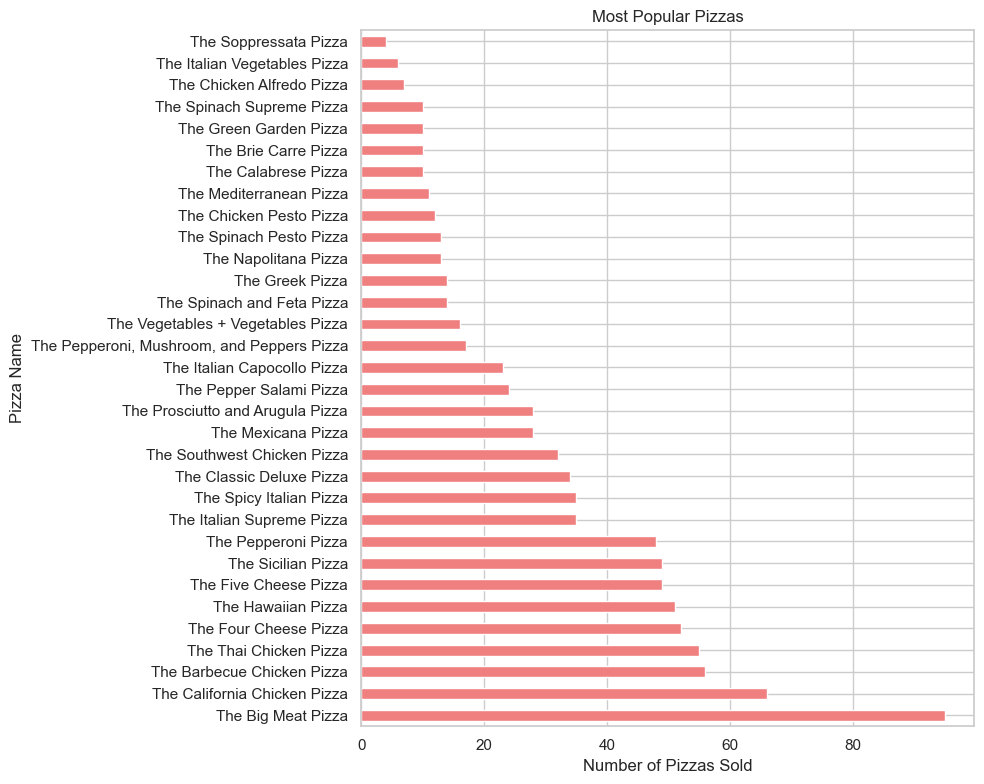

In [25]:
import matplotlib.pyplot as plt

# store value counts in a variable called most_sold_counts
most_sold_counts = most_sold['pizza_name'].value_counts()

# Plot the data
plt.figure(figsize=(10, 8))
most_sold_counts.plot(kind='barh', color='lightcoral')

# Add labels and title
plt.xlabel('Number of Pizzas Sold')
plt.ylabel('Pizza Name')
plt.title('Most Popular Pizzas')

# Show the plot
plt.tight_layout()
plt.show()


The code generates a horizontal bar chart to visualize the popularity of various pizzas based on the number of sales recorded. It first calculates the value counts of each pizza type from the most_sold DataFrame and stores this information in the variable most_sold_counts. The chart is created with matplotlib, featuring a light coral color for the bars.

The resulting plot displays the most popular pizzas on the y-axis and the number of units sold on the x-axis. The horizontal layout provides a clear comparison of pizza popularity, highlighting which pizzas are sold the most. The chart is labeled with appropriate axes and a title, offering an easy-to-read visual representation of the sales data.

In [26]:
most_sold['pizza_size'].value_counts()

pizza_size
L     421
S     256
M     242
XL      8
Name: count, dtype: int64

The code above analyzes the frequency distribution of different pizza sizes within the datasets with the most sold pizzas, specifically from the column 'pizza_size'.

**Resulting Output**:

L (Large): 421 sales
S (Small): 256 sales
M (Medium): 242 sales
XL (Extra Large): 8 sales

**Interpretation**:

Large pizzas are the most popular, making up a significant portion of the sales with 421 units sold.
Small pizzas follow with 256 units sold, showing a moderate demand.
Medium pizzas are close behind with 242 sales, indicating they are almost as popular as small pizzas.
Extra Large pizzas are the least popular, with only 8 sales, suggesting minimal demand for this size.

**Insights | Value**:

This analysis can guide inventory planning, marketing strategies, and pricing decisions by focusing more on popular sizes (L, S, and M) while reconsidering the offering of XL pizzas.

In [27]:
most_sold['pizza_category'].value_counts()

pizza_category
Classic    295
Chicken    228
Supreme    205
Veggie     199
Name: count, dtype: int64

**Interpretation**:

The analysis reveals the frequency distribution of pizza categories sold.

Classic pizzas are the most popular category, with 295 units sold, indicating strong customer preference for traditional flavors.

Chicken pizzas come second with 228 sales, reflecting moderate demand for poultry-based options.

Supreme pizzas are slightly less popular, with 205 units sold, but still maintain a steady level of demand.

Veggie pizzas are the least popular, with 199 sales, suggesting a smaller but significant customer base for vegetarian options.

**Insights | Value**:

This distribution can help inform product prioritization, ensuring that Classic and Chicken pizzas are well-stocked while maintaining sufficient supply of Supreme and Veggie pizzas to cater to diverse customer preferences.

In [28]:
most_sold['order_time'].value_counts()

order_time
12:25:12    6
11:57:57    4
13:05:09    4
13:31:27    4
12:13:36    3
           ..
17:34:31    1
14:10:56    1
16:12:43    1
17:24:32    1
14:16:35    1
Name: count, Length: 788, dtype: int64

**Interpretation**:
The analysis of order times shows the frequency of specific times when pizza orders were placed.

**12:25:12** is the most frequent order time, with 6 orders, indicating a small peak in demand at this time.
**11:57:57, 13:05:09, and 13:31:27** each have 4 orders, showing consistent ordering activity around late morning and early afternoon.
**12:13:36** has 3 orders, adding to the trend of increased orders around lunchtime.

**Insights | Value**:

Most other order times occur only once, with 788 unique times in total, indicating that while certain times see repeat orders, the majority of orders are spread out over different times of day. This analysis can help in identifying peak order times for staffing or marketing promotions.

In [29]:
most_sold['order_date'].value_counts()

order_date
30-12-2015    9
24-07-2015    8
18-11-2015    8
4/4/2015      8
8/6/2015      7
             ..
28-02-2015    1
2/11/2015     1
1/11/2015     1
28-10-2015    1
8/11/2015     1
Name: count, Length: 324, dtype: int64

**Interpretation**:

The analysis of order dates reveals the frequency of pizza orders on specific dates.

**30-12-2015** is the most frequent order date with **9 orders**, suggesting a potential spike in demand around this time, possibly due to the holiday season.
**24-07-2015, 18-11-2015, and 4/4/2015** follow with **8 orders** each, indicating steady activity on these dates.
**8/6/2015 has 7 orders**, further showing consistent ordering trends on key dates throughout the year.

**Insights | Value**:

There are a total of 324 unique order dates, with many dates seeing only 1 order. This distribution suggests that while some dates experience higher order volumes, most dates have sporadic orders. This information can help businesses identify peak sales periods for targeted promotions or resource allocation.

In [30]:
pizza_df['order_date'].value_counts()

order_date
26-11-2015    261
27-11-2015    259
15-10-2015    258
4/7/2015      233
3/7/2015      207
             ... 
27-12-2015     87
22-11-2015     82
29-12-2015     77
22-03-2015     76
30-12-2015     73
Name: count, Length: 358, dtype: int64

Interpretation:

The analysis of the full dataset reveals the frequency of orders on specific dates:

**26-11-2015** recorded the highest number of orders, with 261 orders, followed by **27-11-2015 (259 orders) and 15-10-2015 (258 orders).** These dates likely correspond to peak demand periods, possibly due to promotions, special events, or holidays.
**4/7/2015 and 3/7/2015** also had high order volumes, with **233 and 207 orders respectively**, suggesting strong sales during early July.
Other dates, such as **30-12-2015 (73 orders)**, saw comparatively lower order volumes, though they still indicate notable sales activity.

**Insights | Value**:

**Comparison with the subset of most sold pizzas**:

In the subset of the most sold pizzas, the highest order date was 30-12-2015 with only 9 orders, indicating a significant difference in the order frequency between the full dataset and the subset. This is due to two factors:

**Smaller sample size**: 

The subset dataset is shorter (fewer records) than the full dataset, focusing only on the top-selling pizzas. This naturally limits the number of orders and the variance in order dates.

**Narrower focus**: 

The subset reflects only the best-selling items, which means certain peak dates in the full dataset (like 26-11-2015 with 261 orders) may not align with the highest-selling pizzas. This suggests that the full dataset captures overall trends, while the subset offers insights specific to pizzas with the highest individual sales.

In conclusion, the shorter length of the subset indicates it does not fully represent the overall sales distribution, but it provides a focused view of key items, which is useful for targeted inventory or marketing strategies.

In [31]:
pizza_df['order_time'].value_counts()

order_time
12:32:00    26
11:59:10    24
12:53:29    23
12:52:36    23
12:26:04    23
            ..
12:32:48     1
22:04:30     1
20:35:35     1
12:43:50     1
22:09:54     1
Name: count, Length: 16382, dtype: int64

**Interpretation**:

The analysis of the full dataset reveals the frequency of pizza orders placed at specific times.

**12:32:00** is the most frequent order time, with 26 orders, indicating a potential spike in orders around lunchtime.
**11:59:10, 12:53:29, 12:52:36, and 12:26:04** also see high volumes, each with 23-24 orders, reinforcing the trend of increased activity during the midday period.
Many other order times appear only once, as there are a total of 16,382 unique order times, suggesting that the majority of orders are spread across various times throughout the day.

**Insights | Value**:

**Comparison with the subset of most sold pizzas**:

In the subset of the most sold pizzas, the highest frequency for an order time was 12:25:12, with only 6 orders, showing a significant difference compared to the full dataset. This difference is due to two key factors:

**Smaller sample size**:

The subset dataset is much shorter than the full dataset, focusing only on the most popular pizzas. As a result, it captures fewer unique order times and displays less variability.

**Limited scope**: 

The subset reflects only the best-selling pizzas, so the peak order times may not align with overall patterns in the full dataset. For example, while 12:32:00 is a major peak in the full data, it doesn’t appear in the top times for the subset.

The shorter length of the subset dataset highlights the fact that it only provides a narrower view of popular pizzas, while the full dataset shows a more comprehensive picture of customer behavior across all pizzas.


In [32]:
time = pizza_data[(pizza_df['order_time']=='12:32:00') | (pizza_df['order_time']=='11:59:10') | (pizza_df['order_time']=='12:53:29') | (pizza_df['order_time']=='12:52:36') | (pizza_df['order_time']=='12:26:04')].sort_values('quantity')
time

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
2849,2850.0,1261.0,big_meat_s,1.0,22-01-2015,12:32:00,12.00,12.0,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
21940,21941.0,9634.0,the_greek_s,1.0,11/6/2015,12:52:36,12.00,12.0,S,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
21937,21938.0,9634.0,pep_msh_pep_m,1.0,11/6/2015,12:52:36,14.50,14.5,M,Classic,"Pepperoni, Mushrooms, Green Peppers","The Pepperoni, Mushroom, and Peppers Pizza"
21936,21937.0,9634.0,napolitana_s,1.0,11/6/2015,12:52:36,12.00,12.0,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
21935,21936.0,9634.0,mexicana_s,1.0,11/6/2015,12:52:36,12.00,12.0,S,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
21938,21939.0,9634.0,sicilian_s,2.0,11/6/2015,12:52:36,12.25,24.5,S,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
21939,21940.0,9634.0,spicy_ital_l,2.0,11/6/2015,12:52:36,20.75,41.5,L,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",The Spicy Italian Pizza
32978,32979.0,14582.0,big_meat_s,2.0,1/9/2015,12:32:00,12.00,24.0,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
16050,16051.0,7062.0,ital_veggie_s,2.0,29-04-2015,11:59:10,12.75,25.5,S,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ...",The Italian Vegetables Pizza


**Interpretation**:

The code filters the pizza_data DataFrame to select rows where the order times are the five most frequent times identified in the previous analysis: **12:32:00, 11:59:10, 12:53:29, 12:52:36, and 12:26:04.** After filtering, the data is sorted by the quantity column, likely to organize the data in ascending order of pizza quantities sold during these peak times.

**Insights | Value**:

This operation helps identify the quantity of pizzas ordered at the busiest times, providing insight into order patterns during high-demand periods.

In [33]:
time['pizza_category'].value_counts()

pizza_category
Classic    40
Supreme    29
Veggie     27
Chicken    23
Name: count, dtype: int64

**Interpretation**:

**Classic pizzas** dominate the orders during peak times, **with 40 orders**, indicating a **strong preference for traditional flavors** among customers during these high-demand periods.

Supreme, Veggie, and Chicken pizzas follow, with 29, 27, and 23 orders, respectively. While these categories are less popular than Classic, they still maintain significant demand during the busiest times.

**Insights | Value**:

This breakdown offers valuable insights into customer preferences at peak times, which can help with menu planning, promotions, and ensuring the right stock levels during high-traffic periods.

In [34]:
time['pizza_name'].value_counts()

pizza_name
The Sicilian Pizza                            9
The Pepperoni Pizza                           7
The Hawaiian Pizza                            7
The Classic Deluxe Pizza                      6
The Napolitana Pizza                          6
The Barbecue Chicken Pizza                    6
The Greek Pizza                               6
The Spicy Italian Pizza                       5
The Five Cheese Pizza                         5
The Chicken Pesto Pizza                       5
The Italian Capocollo Pizza                   4
The California Chicken Pizza                  4
The Vegetables + Vegetables Pizza             4
The Italian Vegetables Pizza                  4
The Soppressata Pizza                         4
The Southwest Chicken Pizza                   3
The Spinach and Feta Pizza                    3
The Four Cheese Pizza                         3
The Mexicana Pizza                            3
The Italian Supreme Pizza                     3
The Chicken Alfredo Pizza    

**Interpretation**:

The analysis of the most frequent order times reveals the distribution of specific pizzas ordered during these peak periods.

**The Sicilian Pizza** is the most popular choice, with 9 orders.
**The Pepperoni Pizza and The Hawaiian Pizza follow**, with 7 orders each, reflecting a strong preference for these classic flavors.
Other popular pizzas include **The Classic Deluxe Pizza**, **The Napolitana Pizza, and The Barbecue Chicken Pizza**, each with 6 orders, indicating diverse customer tastes.
A wide range of pizzas have 4-5 orders, such as **The Greek Pizza, The Spicy Italian Pizza, and The Chicken Pesto Pizza**, showing steady demand across different flavor profiles.

**Insights | Value**:

Additionally, the total price for all these orders during the peak times sums to $2,062.60, highlighting the significant revenue generated during the busiest times.

This breakdown helps identify customer preferences and sales performance during high-demand periods, allowing businesses to optimize inventory and promotional strategies for their best-selling pizzas.

In [35]:
time['total_price'].sum()

2062.6

The plot displays a horizontal bar chart where each bar represents a different pizza type. The length of each bar corresponds to the number of orders for that pizza between 12 and 1 pm. This visualization helps quickly identify which pizzas were most frequently ordered during this peak hour.

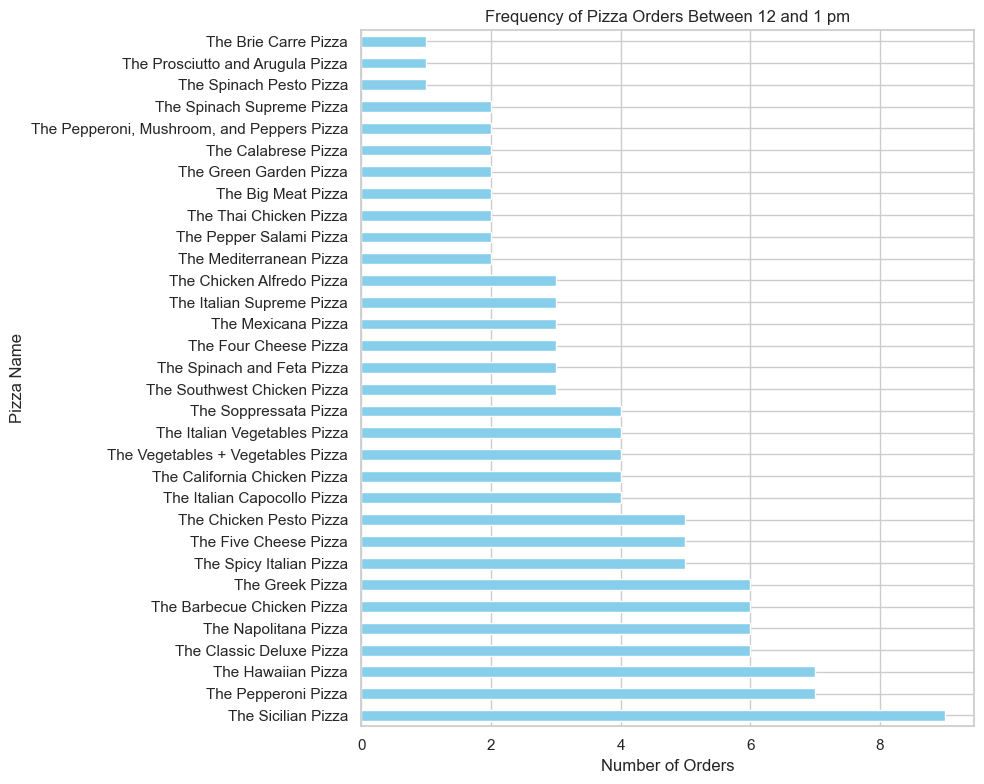

In [36]:
import matplotlib.pyplot as plt

# store value counts in a variable called `pizza_counts`
pizza_counts = time['pizza_name'].value_counts()

# Plot the data
plt.figure(figsize=(10, 8))
pizza_counts.plot(kind='barh', color='skyblue')

# Add labels and title
plt.xlabel('Number of Orders')
plt.ylabel('Pizza Name')
plt.title('Frequency of Pizza Orders Between 12 and 1 pm')

# Show the plot
plt.tight_layout()
plt.show()


In [37]:
most_frequent_time = time[time['order_time']=='12:32:00']
most_frequent_time

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
2849,2850.0,1261.0,big_meat_s,1.0,22-01-2015,12:32:00,12.00,12.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
32977,32978.0,14582.0,bbq_ckn_s,1.0,1/9/2015,12:32:00,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
32979,32980.0,14582.0,cali_ckn_m,1.0,1/9/2015,12:32:00,16.75,16.75,M,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza
32980,32981.0,14582.0,green_garden_m,1.0,1/9/2015,12:32:00,16.00,16.00,M,Veggie,"Spinach, Mushrooms, Tomatoes, Green Olives, Fe...",The Green Garden Pizza
33372,33373.0,14749.0,sicilian_l,1.0,4/9/2015,12:32:00,20.25,20.25,L,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
33371,33372.0,14749.0,peppr_salami_l,1.0,4/9/2015,12:32:00,20.75,20.75,L,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza
33370,33371.0,14749.0,hawaiian_l,1.0,4/9/2015,12:32:00,16.50,16.50,L,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
32984,32985.0,14582.0,napolitana_m,1.0,1/9/2015,12:32:00,16.00,16.00,M,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
32983,32984.0,14582.0,ital_supr_l,1.0,1/9/2015,12:32:00,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
32982,32983.0,14582.0,ital_cpcllo_l,1.0,1/9/2015,12:32:00,20.50,20.50,L,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",The Italian Capocollo Pizza


The code filters the time DataFrame to select rows where the order time is exactly 12:32:00, storing the result in the variable most_frequent_time.

**Insights | Value**:

Focus: The code isolates data specifically for the most frequent order time identified, which is 12:32:00.
Insight Gained: By focusing on this particular time, you can gain detailed insights into what pizzas were ordered, their quantities, and their total price during this peak period. This helps in understanding customer preferences and sales performance at this exact time, allowing for more precise inventory management and targeted marketing strategies for high-demand periods.

In [38]:
most_frequent_time['pizza_name'].value_counts()

pizza_name
The Big Meat Pizza              2
The Sicilian Pizza              2
The Four Cheese Pizza           2
The Hawaiian Pizza              2
The Greek Pizza                 2
The Green Garden Pizza          2
The Pepper Salami Pizza         1
The Napolitana Pizza            1
The Italian Supreme Pizza       1
The Italian Capocollo Pizza     1
The Barbecue Chicken Pizza      1
The Pepperoni Pizza             1
The Chicken Pesto Pizza         1
The Spinach Supreme Pizza       1
The Spicy Italian Pizza         1
The Southwest Chicken Pizza     1
The California Chicken Pizza    1
The Five Cheese Pizza           1
The Classic Deluxe Pizza        1
The Calabrese Pizza             1
Name: count, dtype: int64

**Interpretation**:

The analysis of most_frequent_time, which captures orders specifically at 12:32:00, reveals the following:

**Pizza Distribution**:

**The Big Meat Pizza, The Sicilian Pizza, The Four Cheese Pizza, The Hawaiian Pizza, The Greek Pizza, and The Green Garden Pizza** each had **2 orders**.

Several other pizzas, including **The Pepper Salami Pizza, The Napolitana Pizza, and The Italian Supreme Pizza, had 1 order** each.

**Total Sales**:
The total revenue for orders placed at 12:32:00 amounts to $460.20.

**Insights**:

**Popular Pizzas**: 

The distribution shows that a few pizza types, particularly The Big Meat Pizza and The Sicilian Pizza, were more popular at this specific time compared to others.
**Sales Performance**:
The total revenue of $460.20 highlights the significant contribution of this time slot to overall sales, suggesting that 12:32:00 is a key time for generating substantial revenue.
Customer Preferences: The diversity in pizza orders at this time indicates varied customer preferences, which can help in planning promotions or optimizing stock for popular items during peak hours.
Understanding these insights can guide marketing strategies, inventory management, and pricing decisions for periods of high demand.

In [39]:
most_frequent_time['total_price'].sum()

460.2

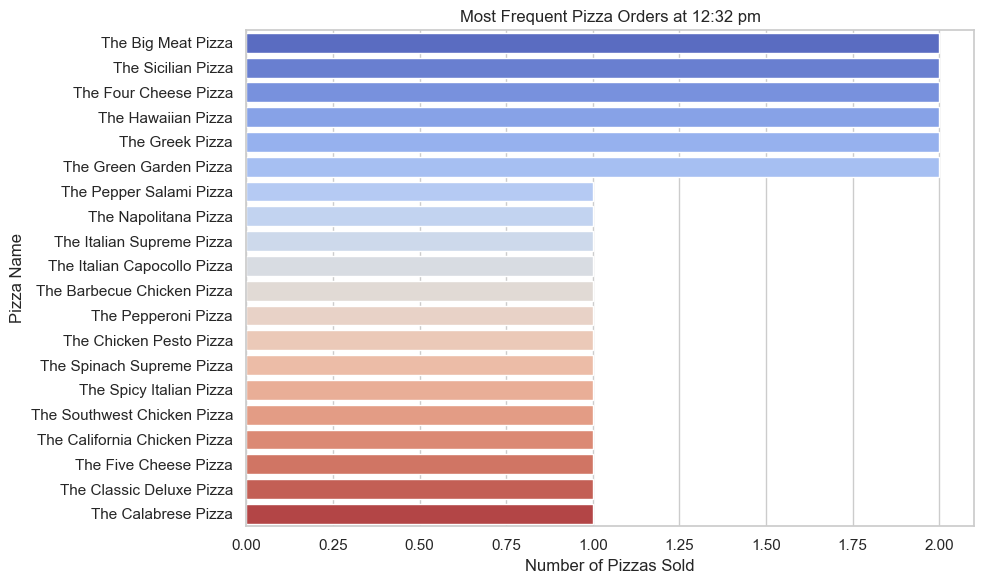

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# store count of most popular time frequency in a variable most_frequent_counts
most_frequent_counts = most_frequent_time['pizza_name'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a horizontal barplot
sns.barplot(y=most_frequent_counts.index, x=most_frequent_counts.values, palette='coolwarm')

# Add labels and title
plt.xlabel('Number of Pizzas Sold')
plt.ylabel('Pizza Name')
plt.title('Most Frequent Pizza Orders at 12:32 pm')

# Show the plot
plt.tight_layout()
plt.show()


The code uses Seaborn and Matplotlib to generate a horizontal bar plot that visualizes the number of pizzas sold at 12:32 pm. It calculates the count of each pizza type from the most_frequent_time DataFrame, where most pizzas have a count of 2, and a few types have a count of 1. The plot, sized at 10x6 inches, displays these counts with pizza names on the y-axis and the number of pizzas sold on the x-axis, using a 'coolwarm' color palette. The plot is labeled with appropriate axes titles and a descriptive title, providing a clear visual comparison of pizza order frequencies at the specified time.








In [41]:
most_frequent_time['order_date'].value_counts()

order_date
1/4/2015      11
1/9/2015       8
22-01-2015     4
4/9/2015       3
Name: count, dtype: int64

In [42]:
pizza_df['quantity'].value_counts()

quantity
1.0    47693
2.0      903
3.0       21
4.0        3
Name: count, dtype: int64

In [43]:
single_purchase = pizza_df[pizza_df['quantity']==1]
single_purchase

,pizza_id,order_id,quantity,unit_price,total_price,pizza_name_id,order_date,order_time,pizza_size,pizza_category,pizza_ingredients,pizza_name,pizza_name
0,1.0,1.0,1.0,13.25,13.25,hawaiian_m,1/1/2015,11:38:36,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,The Hawaiian Pizza
1,2.0,2.0,1.0,16.00,16.00,classic_dlx_m,1/1/2015,11:57:40,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,The Classic Deluxe Pizza
2,3.0,2.0,1.0,18.50,18.50,five_cheese_l,1/1/2015,11:57:40,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,The Five Cheese Pizza
3,4.0,2.0,1.0,20.75,20.75,ital_supr_l,1/1/2015,11:57:40,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,The Italian Supreme Pizza
4,5.0,2.0,1.0,16.00,16.00,mexicana_m,1/1/2015,11:57:40,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616.0,21348.0,1.0,16.75,16.75,ckn_alfredo_m,31-12-2015,21:23:10,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,The Chicken Alfredo Pizza
48616,48617.0,21348.0,1.0,17.95,17.95,four_cheese_l,31-12-2015,21:23:10,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,The Four Cheese Pizza
48617,48618.0,21348.0,1.0,12.00,12.00,napolitana_s,31-12-2015,21:23:10,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,The Napolitana Pizza
48618,48619.0,21349.0,1.0,20.25,20.25,mexicana_l,31-12-2015,22:09:54,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,The Mexicana Pizza


The code filters the pizza_df DataFrame to isolate rows where the 'quantity' column is equal to 1, thus identifying individual pizza purchases. The result, stored in the single_purchase variable, contains data on pizzas that were bought in single quantities. This operation helps focus on and analyze transactions where only one pizza was purchased, distinguishing them from orders with multiple pizzas.

In [44]:
single_purchase['pizza_category'].value_counts()

pizza_category
Classic    14284
Supreme    11572
Veggie     11250
Chicken    10587
Name: count, dtype: int64

The results indicate that the "Classic" category has the highest count with 14,284 single purchases, followed by "Supreme" with 11,572, "Veggie" with 11,250, and "Chicken" with 10,587. This distribution suggests that Classic pizzas are the most popular choice for single purchases, while Chicken pizzas are the least popular among the categories listed. These insights can help in understanding customer preferences for single pizza orders and potentially guiding inventory or marketing strategies.

In [45]:
single_purchase.dtypes

pizza_id             float64
order_id             float64
quantity             float64
unit_price           float64
total_price          float64
pizza_name_id         object
order_date            object
order_time            object
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
pizza_name            object
dtype: object

In [46]:
type(single_purchase)

pandas.core.frame.DataFrame

In [47]:
categorical_columns = [['order_date','order_time','pizza_category','pizza_ingredients','pizza_name']]

In [48]:
import pandas as pd

# Export 'single_purchase' DataFrame to an Excel file
single_purchase.to_excel('single_purchase_data.xlsx', index=False)

print("Data exported successfully!")


Data exported successfully!


In [49]:
single_purchase = pd.read_excel("C:/Users/Collins PC/Downloads/pizza_data/single_purchase_data.xlsx")
single_purchase

,pizza_id,order_id,quantity,unit_price,total_price,pizza_name_id,order_date,order_time,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,1,13.25,13.25,hawaiian_m,1/1/2015,11:38:36,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,1,16.00,16.00,classic_dlx_m,1/1/2015,11:57:40,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,1,18.50,18.50,five_cheese_l,1/1/2015,11:57:40,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,1,20.75,20.75,ital_supr_l,1/1/2015,11:57:40,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,1,16.00,16.00,mexicana_m,1/1/2015,11:57:40,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
47688,48616,21348,1,16.75,16.75,ckn_alfredo_m,31-12-2015,21:23:10,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
47689,48617,21348,1,17.95,17.95,four_cheese_l,31-12-2015,21:23:10,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
47690,48618,21348,1,12.00,12.00,napolitana_s,31-12-2015,21:23:10,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
47691,48619,21349,1,20.25,20.25,mexicana_l,31-12-2015,22:09:54,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [50]:
single_purchase['pizza_name'].value_counts()

pizza_name
The Classic Deluxe Pizza                      2382
The Pepperoni Pizza                           2321
The Hawaiian Pizza                            2319
The Barbecue Chicken Pizza                    2316
The Thai Chicken Pizza                        2260
The California Chicken Pizza                  2236
The Southwest Chicken Pizza                   1853
The Spicy Italian Pizza                       1852
The Sicilian Pizza                            1838
The Italian Supreme Pizza                     1814
The Four Cheese Pizza                         1798
The Big Meat Pizza                            1716
The Vegetables + Vegetables Pizza             1494
The Napolitana Pizza                          1438
The Mexicana Pizza                            1428
The Spinach and Feta Pizza                    1418
The Prosciutto and Arugula Pizza              1400
The Pepper Salami Pizza                       1398
The Greek Pizza                               1392
The Italian Capocoll

In [51]:
single_purchase['total_price'].sum()

786457.1

The code analyzes individual pizza purchases by evaluating the frequency of each pizza type and the total revenue generated.

**Pizza Frequency**:

The operation reveals the most popular pizzas among single-quantity purchases. The **"Classic Deluxe Pizza" leads** with **2,382 single purchases**, closely followed by the **"Pepperoni Pizza" (2,321)** and **"Hawaiian Pizza" (2,319).** In contrast, the **least frequently purchased single pizza** is **the "Brie Carre Pizza" with only 470 purchases**. This distribution highlights customer preferences, indicating that certain pizza types are significantly more popular for single orders.

**Revenue**:

The total revenue from single pizza purchases **amounts to $786,457.10**. This figure provides insight into the financial impact of single-quantity sales, illustrating their contribution to overall revenue.

**Insights | Value**:

In summary, the analysis shows that **classic and chicken-themed pizzas** are favored for single purchases, while less popular varieties contribute less to sales. The total revenue figure underscores the **substantial financial value** of these **single-quantity** transactions.

In [53]:
single_purchase['order_date'].value_counts()

order_date
26-11-2015    256
27-11-2015    255
15-10-2015    254
4/7/2015      232
15-05-2015    203
             ... 
27-12-2015     85
22-11-2015     80
22-03-2015     75
29-12-2015     74
30-12-2015     64
Name: count, Length: 358, dtype: int64

Summary Report on Code and Output:
The code retrieves the frequency of pizza orders by their order_date from the single_purchase DataFrame. The result shows how many orders occurred on specific dates. For instance, on **November 26, 2015, there were 256 orders**, while on **November 27, 2015, there were 255 orders**, and so on.

**Total Unique Order Dates**: 358 dates

**Highest Order Counts**: **November 26 and 27, 2015, with 256 and 255 orders**, respectively.
**Lowest Order Counts**: The least orders occurred on **December 30, 2015**, with only **64 orders**.
**Notable Observation**: Out of **365 days** in a year, there were significant single-order sales on **358 days**, which shows that the establishment has **consistently high traffic** for **individual pizza purchases** throughout the year. This is indicative of steady demand and frequent customer engagement.

**Comparison to the Most Sold Data**:

Compared to the earlier analysis on the most_sold DataFrame, which includes pizzas sold in higher quantities (2, 3, or 4 pizzas per order). Here, order_date showed different patterns:

**Highest Order Dates for Most Sold**: **December 30, 2015 (9 orders)**, **July 24, 2015 (8 orders)**.
Total Unique Order Dates: **324 dates** (in contrast to **358** dates in **single_purchase**).
Key Differences:

**Insights | Value**:

The most_sold dataset captures fewer unique dates and generally shows lower counts on specific dates compared to single_purchase, which tracks individual pizza sales.
November 26 and 27, 2015, stand out in the single_purchase data but are not significant in the most_sold report.
This comparison highlights the variance in ordering patterns when looking at single vs. bulk purchases. The large number of unique order dates for single orders emphasizes the consistent, widespread traffic the establishment experiences throughout the year for individual orders.

# Pizza Categories

The code filters the single_purchase DataFrame to isolate and analyze transactions where the pizza category is **"Classic"** focusing specifically on individual purchases within this category.

In [54]:
classic_single = single_purchase[single_purchase['pizza_category']=="Classic"]

In [55]:
classic_single

,pizza_id,order_id,quantity,unit_price,total_price,pizza_name_id,order_date,order_time,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,1,13.25,13.25,hawaiian_m,1/1/2015,11:38:36,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,1,16.00,16.00,classic_dlx_m,1/1/2015,11:57:40,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
11,12,6,1,12.00,12.00,the_greek_s,1/1/2015,12:29:36,S,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
14,15,9,1,12.00,12.00,classic_dlx_s,1/1/2015,12:52:01,S,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
16,17,9,1,20.50,20.50,ital_cpcllo_l,1/1/2015,12:52:01,L,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",The Italian Capocollo Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
47674,48601,21343,1,15.25,15.25,pepperoni_l,31-12-2015,20:27:23,L,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza
47677,48605,21344,1,12.50,12.50,pepperoni_m,31-12-2015,20:43:46,M,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza
47678,48606,21345,1,12.00,12.00,classic_dlx_s,31-12-2015,20:44:43,S,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
47680,48608,21346,1,12.00,12.00,big_meat_s,31-12-2015,20:51:07,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza


The codes below perform two key analyses on the classic_single DataFrame, which tracks single pizza orders from the "Classic" category:

**Total Revenue Calculation**:

The code below calculates the **total revenue generated from these single orders**. The **result is $211,601.60**, which reflects the total sales amount for all pizzas in the Classic category.

**Pizza Popularity Analysis**:

The code also provides the count of each pizza sold in the "Classic" category. The output shows how frequently each type of pizza was ordered:

**The Classic Deluxe Pizza was the most popular**, with **2,382 orders**.
**The Pepperoni Pizza followed closely** with **2,321 orders**.
Other popular pizzas include **The Hawaiian Pizza (2,319 orders), The Big Meat Pizza (1,716 orders), and The Napolitana Pizza (1,438 orders)**.
The least frequently ordered among the top pizzas was **The Pepperoni, Mushroom, and Peppers Pizza**, with **1,325 orders**.

**Insights | Value**:

Calculate total sales for single orders of "Classic" pizzas to understand their revenue contribution.
Rank the pizzas by popularity within the "Classic" category to identify the top-selling pizzas and gauge customer preferences.
The analysis helps the business track financial performance and product demand, allowing for targeted marketing or inventory decisions based on the most popular pizzas.








In [56]:
classic_single['total_price'].sum()

211601.59999999998

In [57]:
classic_single['pizza_name'].value_counts()

pizza_name
The Classic Deluxe Pizza                      2382
The Pepperoni Pizza                           2321
The Hawaiian Pizza                            2319
The Big Meat Pizza                            1716
The Napolitana Pizza                          1438
The Greek Pizza                               1392
The Italian Capocollo Pizza                   1391
The Pepperoni, Mushroom, and Peppers Pizza    1325
Name: count, dtype: int64

The code filters the **most_sold** DataFrame to select rows where the pizza category is **"Classic"** targeting pizza sales with **quantities of two or more.**

In [58]:
classic_double_and_over = most_sold[most_sold['pizza_category']=="Classic"]

In [59]:
classic_double_and_over

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
31755,31756.0,14019.0,pepperoni_m,2.0,22-08-2015,12:54:38,12.5,25.0,M,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza
31898,31899.0,14081.0,big_meat_s,2.0,23-08-2015,12:52:55,12.0,24.0,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
31906,31907.0,14082.0,ital_cpcllo_l,2.0,23-08-2015,12:54:55,20.5,41.0,L,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",The Italian Capocollo Pizza
32048,32049.0,14152.0,big_meat_s,2.0,24-08-2015,16:44:07,12.0,24.0,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
32101,32102.0,14183.0,napolitana_l,2.0,25-08-2015,12:36:20,20.5,41.0,L,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
29652,29653.0,13100.0,big_meat_s,3.0,7/8/2015,12:53:47,12.0,36.0,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
21813,21814.0,9575.0,big_meat_s,3.0,10/6/2015,12:20:23,12.0,36.0,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
37209,37210.0,16429.0,hawaiian_l,3.0,3/10/2015,21:12:23,16.5,49.5,L,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
11976,11977.0,5264.0,big_meat_s,4.0,30-03-2015,13:24:35,12.0,48.0,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza


In [60]:
classic_double_and_over['total_price'].sum()

8451.5

In [61]:
classic_double_and_over['pizza_name'].value_counts()

pizza_name
The Big Meat Pizza                            95
The Hawaiian Pizza                            51
The Pepperoni Pizza                           48
The Classic Deluxe Pizza                      34
The Italian Capocollo Pizza                   23
The Pepperoni, Mushroom, and Peppers Pizza    17
The Greek Pizza                               14
The Napolitana Pizza                          13
Name: count, dtype: int64

The code above focuses on analyzing the classic_double_and_over DataFrame, which is a filtered subset of the "Classic" pizzas from the most_sold DataFrame (orders where 2 or more pizzas were bought).

Total Revenue Calculation:

The code classic_double_and_over['total_price'].sum() calculates the total revenue generated from "Classic" pizzas ordered in quantities of 2 or more. The **total revenue is $8,451.50**, representing sales from **bulk orders** in the **Classic** Category.

Pizza Popularity Analysis: 

**The Big Meat Pizza** is the most popular in this category, with **95 orders**.
**The Hawaiian Pizza** follows with **51 orders**, and **The Pepperoni Pizza** with **48 orders**.
Other notable pizzas include **The Classic Deluxe Pizza (34 orders)**, The **Italian Capocollo Pizza (23 orders)**, and The Pepperoni, Mushroom, and Peppers Pizza (17 orders).
The **Greek Pizza** and **The Napolitana Pizza** are among the **least ordered** in this category, with **14 and 13 orders, respectively**.

**Insights | Value**:

Calculate total sales for "Classic" pizzas that were sold in double or larger quantities, helping the business understand the revenue contribution from bulk orders in this popular pizza category.
Identify which pizzas are **favored in bulk orders**, providing insights into customer preferences **when ordering in higher quantities**.


In [62]:
classic_double_and_over['pizza_size'].value_counts()

pizza_size
S     155
L      68
M      64
XL      8
Name: count, dtype: int64

The results show that **small (S)** pizzas were the most frequently ordered size, **with 155 orders**, followed by **large (L) pizzas** with **68 orders**, and **medium (M) pizzas** with **64 orders**. There were only 8 orders for extra-large (XL) pizzas. This indicates a **preference** for **smaller-sized pizzas** when **customers order multiple pizzas** in the **"Classic"** category.








**Chicken**

The code filters the single_purchase DataFrame to isolate and analyze transactions where the pizza category is **"Chicken"** focusing specifically on individual purchases within this category.

In [63]:
chicken_single = single_purchase[single_purchase['pizza_category']=="Chicken"]

In [64]:
chicken_single

,pizza_id,order_id,quantity,unit_price,total_price,pizza_name_id,order_date,order_time,pizza_size,pizza_category,pizza_ingredients,pizza_name
5,6,2,1,20.75,20.75,thai_ckn_l,1/1/2015,11:57:40,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
10,11,6,1,12.75,12.75,bbq_ckn_s,1/1/2015,12:29:36,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
24,25,10,1,20.75,20.75,southw_ckn_l,1/1/2015,13:00:15,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza
25,26,11,1,20.75,20.75,bbq_ckn_l,1/1/2015,13:02:59,L,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
26,27,11,1,20.75,20.75,cali_ckn_l,1/1/2015,13:02:59,L,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
47682,48610,21346,1,12.75,12.75,cali_ckn_s,31-12-2015,20:51:07,S,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza
47684,48612,21347,1,16.75,16.75,bbq_ckn_m,31-12-2015,21:14:37,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
47687,48615,21347,1,20.75,20.75,southw_ckn_l,31-12-2015,21:14:37,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza
47688,48616,21348,1,16.75,16.75,ckn_alfredo_m,31-12-2015,21:23:10,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza


In [65]:
chicken_single['total_price'].sum()

187268.25

In [66]:
chicken_single['pizza_name'].value_counts()

pizza_name
The Barbecue Chicken Pizza      2316
The Thai Chicken Pizza          2260
The California Chicken Pizza    2236
The Southwest Chicken Pizza     1853
The Chicken Alfredo Pizza        973
The Chicken Pesto Pizza          949
Name: count, dtype: int64

The code analyzes the chicken_single DataFrame, which tracks single orders for "Chicken" category pizzas.

**Total Revenue Calculation**: 

The code chicken_single['total_price'].sum() calculates the total revenue generated from single orders in the **"Chicken"** category. The total **revenue is $187,268.25**, indicating the significant contribution of chicken-based pizzas to overall sales.

**Pizza Popularity Analysis**: 

**The Barbecue Chicken Pizza** is the most popular, with **2,316 orders**.
Other top sellers include The **Thai Chicken Pizza with 2,260 orders**, and **The California Chicken Pizza** with **2,236 orders**.
**The Southwest Chicken Pizza** follows with **1,853 orders**.
**Less frequently ordered pizzas** are **The Chicken Alfredo Pizza (973 orders)** and **The Chicken Pesto Pizza (949 orders)**.

**Insights | Value**:

Calculate total sales for individual orders in the "Chicken" pizza category, offering insight into its revenue generation.
To identify customer preferences by ranking chicken pizzas based on their popularity, allowing the business to focus on top-selling products such as the Barbecue and Thai Chicken pizzas while recognizing opportunities to boost sales of lesser-ordered items like Chicken Alfredo and Chicken Pesto.







In [67]:
chicken_double_and_over = most_sold[most_sold['pizza_category']=="Chicken"]

In [68]:
chicken_double_and_over

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
31773,31774.0,14023.0,thai_ckn_l,2.0,22-08-2015,14:00:44,20.75,41.50,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
31918,31919.0,14089.0,bbq_ckn_s,2.0,23-08-2015,14:45:56,12.75,25.50,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
31961,31962.0,14108.0,thai_ckn_l,2.0,23-08-2015,19:10:56,20.75,41.50,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
32189,32190.0,14223.0,cali_ckn_l,2.0,25-08-2015,20:35:19,20.75,41.50,L,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza
32202,32203.0,14230.0,bbq_ckn_l,2.0,26-08-2015,11:39:11,20.75,41.50,L,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
18317,18318.0,8040.0,thai_ckn_l,3.0,15-05-2015,14:13:27,20.75,62.25,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
42846,42847.0,18845.0,bbq_ckn_m,3.0,18-11-2015,12:25:12,16.75,50.25,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
38953,38954.0,17171.0,bbq_ckn_m,3.0,18-10-2015,13:05:09,16.75,50.25,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
38819,38820.0,17112.0,bbq_ckn_l,3.0,17-10-2015,12:56:31,20.75,62.25,L,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [69]:
chicken_double_and_over['total_price'].sum()

8651.25

In [70]:
chicken_double_and_over['pizza_name'].value_counts()

pizza_name
The California Chicken Pizza    66
The Barbecue Chicken Pizza      56
The Thai Chicken Pizza          55
The Southwest Chicken Pizza     32
The Chicken Pesto Pizza         12
The Chicken Alfredo Pizza        7
Name: count, dtype: int64

The code analyzes the chicken_double_and_over DataFrame, which filters the most_sold DataFrame to only include "Chicken" category pizzas that were ordered in quantities of 2 or more.

**Total Revenue Calculation**: 

The code chicken_double_and_over['total_price'].sum() calculates the total revenue generated from bulk orders (2 or more pizzas) in the "Chicken" category. The total **revenue is $8,651.25**, reflecting the contribution of bulk orders in this category.

**Pizza Popularity Analysis**: 

**The California Chicken Pizza** is the most popular in **bulk orders**, with **66 orders**.
Other **popular bulk orders** include **The Barbecue Chicken Pizza** with **56 orders**, and The **Thai Chicken Pizza** with **55 orders**.
**The Southwest Chicken Pizza** saw **32 orders**, while **The Chicken Pesto Pizza had 12 orders**, and **The Chicken Alfredo Pizza** had **7 orders**.

**Insights | Value**:

Calculate total sales from bulk orders in the "Chicken" category, helping the business understand the revenue impact of larger orders.
Determine which chicken pizzas are preferred in bulk quantities, identifying top sellers like the California Chicken and Barbecue Chicken pizzas, while lesser-demand bulk items like Chicken Alfredo and Chicken Pesto may require targeted promotions or adjustments to increase sales.
This helps the business focus on improving customer engagement with high-demand pizzas and boosting overall sales from bulk orders.








In [71]:
chicken_double_and_over['unit_price'].value_counts()

unit_price
20.75    129
16.75     80
12.75     19
Name: count, dtype: int64

The results show that the majority of **bulk orders** were for pizzas priced at **20.75 (129 orders)**, followed by **16.75 (80 orders)**, and a smaller portion at **12.75 (19 orders)**. This indicates that customers tend to prefer the higher-priced chicken pizzas when ordering in bulk, with the majority of orders coming from the mid-to-high price range, suggesting that premium options in the chicken pizza category are popular in **larger quantities**.

In [72]:
chicken_double_and_over['pizza_size'].value_counts()

pizza_size
L    129
M     80
S     19
Name: count, dtype: int64

In [73]:
classic_double_and_over['unit_price'].value_counts()

unit_price
12.00    116
16.00     28
20.50     27
16.50     22
12.50     20
10.50     19
15.25     16
9.75      12
13.25     10
11.00      8
25.50      8
14.50      6
17.50      3
Name: count, dtype: int64

The results show that the most frequently ordered pizzas in **bulk** were priced at **12.00 (116 orders)**, followed by **16.00 (28 orders)** and **20.50 (27 orders)**. There is also a noticeable distribution across various other price points, including **16.50 (22 orders)** and **12.50 (20 orders)**.

**Insights | Value**:

**Price Sensitivity**: 

The dominance of the **12.00** price point indicates that customers tend to favor **more affordable pizzas** when ordering in **bulk**. This price seems to be **the sweet spot for "Classic" pizzas**, representing the most **common** choice in **bulk orders**.

**Diverse Price Range**: 

Although lower-priced pizzas are preferred, there is **still demand across a range of higher-priced pizzas**, with some **bulk orders** even reaching as high as **25.50 (8 orders)**.

**Mid-Range Preference**: 

The presence of significant orders at **16.00** and **20.50** shows that mid-range pizzas are also popular, reflecting a willingness to purchase higher-priced items in larger quantities.


Overall, the data indicates that while affordability drives the majority of bulk purchases in the "Classic" category, there is still a market for more premium options. This provides valuable insights for pricing strategies and potential promotions targeting different customer segments.








**Veggie**

The code filters the single_purchase DataFrame to isolate and analyze transactions where the pizza category is **"Veggie"** focusing specifically on individual purchases within this category.

In [74]:
veggie_single = single_purchase[single_purchase['pizza_category']=="Veggie"]

In [75]:
veggie_single

,pizza_id,order_id,quantity,unit_price,total_price,pizza_name_id,order_date,order_time,pizza_size,pizza_category,pizza_ingredients,pizza_name
2,3,2,1,18.50,18.50,five_cheese_l,1/1/2015,11:57:40,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
4,5,2,1,16.00,16.00,mexicana_m,1/1/2015,11:57:40,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
15,16,9,1,12.00,12.00,green_garden_s,1/1/2015,12:52:01,S,Veggie,"Spinach, Mushrooms, Tomatoes, Green Olives, Fe...",The Green Garden Pizza
19,20,9,1,12.00,12.00,mexicana_s,1/1/2015,12:52:01,S,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
21,22,9,1,20.75,20.75,spin_pesto_l,1/1/2015,12:52:01,L,Veggie,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat...",The Spinach Pesto Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
47672,48599,21342,1,20.25,20.25,mexicana_l,31-12-2015,20:02:57,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
47676,48604,21344,1,14.75,14.75,four_cheese_m,31-12-2015,20:43:46,M,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
47679,48607,21345,1,16.50,16.50,spin_pesto_m,31-12-2015,20:44:43,M,Veggie,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat...",The Spinach Pesto Pizza
47689,48617,21348,1,17.95,17.95,four_cheese_l,31-12-2015,21:23:10,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza


In [76]:
veggie_single['total_price'].sum()

186724.24999999997

In [77]:
veggie_single['pizza_name'].value_counts()

pizza_name
The Four Cheese Pizza                1798
The Vegetables + Vegetables Pizza    1494
The Mexicana Pizza                   1428
The Spinach and Feta Pizza           1418
The Five Cheese Pizza                1310
The Green Garden Pizza                977
The Italian Vegetables Pizza          969
The Spinach Pesto Pizza               944
The Mediterranean Pizza               912
Name: count, dtype: int64

The code performs two key analyses on the veggie_single DataFrame, which tracks single orders for "Veggie" category pizzas.

**Total Revenue Calculation**:

The code veggie_single['total_price'].sum() calculates the total revenue generated from single orders in the "Veggie" category. The total **revenue amounts to $186,724.25**, demonstrating the strong demand for veggie pizzas and their significant contribution to overall sales.

**Pizza Popularity Analysis**:

**The Four Cheese Pizza** is the most popular, with **1,798 orders**, reflecting its appeal as a customer favorite.
**Other popular** veggie pizzas include **The Vegetables + Vegetables Pizza** with **1,494 orders**, **The Mexicana Pizza** with **1,428 orders**, and **The Spinach and Feta Pizza** with **1,418 orders**.
**Lesser-ordered pizzas** include **The Green Garden Pizza (977 orders)**, **The Italian Vegetables Pizza (969 orders)**, and **The Spinach Pesto Pizza (944 orders)**, while **The Mediterranean Pizza** is the least ordered, with **912 orders**.


**Insights | Value**:

**Revenue Contribution**:

With **over $186,000 in sales**, the **veggie category is a strong performer**, indicating that there is a substantial market for vegetarian pizzas.

**Customer Preferences**: 

The Four Cheese Pizza dominates in popularity, followed closely by the Vegetables + Vegetables Pizza, indicating a strong customer preference for cheese-heavy or traditional vegetable pizzas.

**Opportunity for Growth**: 

While pizzas like The Mediterranean Pizza and The Spinach Pesto Pizza have lower order counts, they still contribute meaningfully to sales. These items may benefit from targeted promotions or menu placement to increase visibility.
The analysis suggests that while the veggie pizza category performs well overall, focusing on top sellers and improving the performance of lesser-ordered pizzas could further optimize revenue.








In [78]:
veggie_double_and_over = most_sold[most_sold['pizza_category']=="Veggie"]

In [79]:
veggie_double_and_over

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48,49.0,17.0,mediterraneo_m,2.0,1/1/2015,13:53:00,16.00,32.0,M,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie...",The Mediterranean Pizza
32236,32237.0,14244.0,mexicana_l,2.0,26-08-2015,14:38:53,20.25,40.5,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
32359,32360.0,14301.0,mediterraneo_l,2.0,27-08-2015,12:48:15,20.25,40.5,L,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie...",The Mediterranean Pizza
32867,32868.0,14531.0,four_cheese_m,2.0,31-08-2015,13:11:52,14.75,29.5,M,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
32991,32992.0,14583.0,mediterraneo_m,2.0,1/9/2015,12:45:11,16.00,32.0,M,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie...",The Mediterranean Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
13274,13275.0,5820.0,four_cheese_l,2.0,8/4/2015,13:51:43,17.95,35.9,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
17051,17052.0,7501.0,mexicana_l,2.0,6/5/2015,17:53:38,20.25,40.5,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
17110,17111.0,7528.0,five_cheese_l,2.0,7/5/2015,12:45:58,18.50,37.0,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
17145,17146.0,7543.0,five_cheese_l,2.0,7/5/2015,14:42:32,18.50,37.0,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza


In [80]:
veggie_double_and_over['total_price'].sum()

6966.199999999999

In [81]:
veggie_double_and_over['pizza_name'].value_counts()

pizza_name
The Four Cheese Pizza                52
The Five Cheese Pizza                49
The Mexicana Pizza                   28
The Vegetables + Vegetables Pizza    16
The Spinach and Feta Pizza           14
The Spinach Pesto Pizza              13
The Mediterranean Pizza              11
The Green Garden Pizza               10
The Italian Vegetables Pizza          6
Name: count, dtype: int64

The code analyzes pizzas from the "Veggie" category that were sold in quantities of two or more.

**Pizza Frequency**: 

The veggie_double_and_over['pizza_name'].value_counts() operation shows that the most frequently sold veggie pizzas in larger quantities are "The Four Cheese Pizza" (52 sales) and "The Five Cheese Pizza" (49 sales). Other popular options include "The Mexicana Pizza" (28 sales) and "The Vegetables + Vegetables Pizza" (16 sales). Pizzas like "The Italian Vegetables Pizza" are the least sold with just 6 sales.

**Revenue**: 

The total revenue generated from these multi-quantity veggie pizza sales is $6,966.20. This provides insight into the financial contribution of veggie pizzas sold in larger orders, indicating that cheese-based veggie pizzas are particularly popular and revenue-driving in this category.

**Insights | Value**:

In summary, **cheese-heavy pizzas dominate** the **veggie category** for **larger orders**, with **"The Four Cheese" and "The Five Cheese" pizzas** being the **top sellers**, contributing significantly to the total revenue.








In [82]:
veggie_double_and_over['pizza_size'].value_counts()

pizza_size
L    139
M     31
S     29
Name: count, dtype: int64

In [83]:
veggie_double_and_over['unit_price'].value_counts()

unit_price
18.50    49
17.95    43
20.25    42
12.00    19
16.00    18
14.75     9
12.50     7
20.75     5
16.75     3
12.75     3
16.50     1
Name: count, dtype: int64

The code evaluates the unit prices of veggie pizzas sold in quantities of two or more and computes the total revenue from those sales.

**Unit Price Distribution**: 

The most common unit price for veggie pizzas in **larger orders** is **18.50 (49 sales)**, followed by **17.95 (43 sales)** and **20.25 (42 sales)**. This indicates that higher-priced veggie pizzas are more frequently sold in larger quantities, reflecting consumer preference for premium pizzas in this category.

**Insights | Value**: 

The total **revenue generated** from these **sales is $6,966.20**, which is a significant contribution from multi-pizza orders in the veggie category.

From the dataset, it's clear that **premium-priced veggie pizzas** drive the **majority** of the **revenue** from **large-quantity orders**

**Supreme**

The code filters the single_purchase DataFrame to isolate and analyze transactions where the pizza category is **"Supreme"** focusing specifically on individual purchases within this category.

In [84]:
supreme_single = single_purchase[single_purchase['pizza_category']=="Supreme"]

In [85]:
supreme_single

,pizza_id,order_id,quantity,unit_price,total_price,pizza_name_id,order_date,order_time,pizza_size,pizza_category,pizza_ingredients,pizza_name
3,4,2,1,20.75,20.75,ital_supr_l,1/1/2015,11:57:40,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
6,7,3,1,16.50,16.50,ital_supr_m,1/1/2015,12:12:28,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
7,8,3,1,20.75,20.75,prsc_argla_l,1/1/2015,12:12:28,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
8,9,4,1,16.50,16.50,ital_supr_m,1/1/2015,12:16:31,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
9,10,5,1,16.50,16.50,ital_supr_m,1/1/2015,12:21:30,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
47665,48592,21339,1,20.75,20.75,peppr_salami_l,31-12-2015,19:46:24,L,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza
47675,48603,21344,1,20.25,20.25,calabrese_l,31-12-2015,20:43:46,L,Supreme,"?duja Salami, Pancetta, Tomatoes, Red Onions, ...",The Calabrese Pizza
47683,48611,21346,1,20.75,20.75,soppressata_l,31-12-2015,20:51:07,L,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",The Soppressata Pizza
47685,48613,21347,1,16.50,16.50,ital_supr_m,31-12-2015,21:14:37,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


In [86]:
supreme_single['total_price'].sum()

200863.0

In [87]:
supreme_single['pizza_name'].value_counts()

pizza_name
The Spicy Italian Pizza             1852
The Sicilian Pizza                  1838
The Italian Supreme Pizza           1814
The Prosciutto and Arugula Pizza    1400
The Pepper Salami Pizza             1398
The Soppressata Pizza                953
The Spinach Supreme Pizza            930
The Calabrese Pizza                  917
The Brie Carre Pizza                 470
Name: count, dtype: int64

The code analyzes single-purchase orders for pizzas in the "Supreme" category, calculating the total revenue and frequency of each pizza type.

Total Revenue: The supreme_single['total_price'].sum() yields a total of $200,863.00 in revenue from single Supreme pizza purchases. This indicates the significant financial contribution of individual orders within this category.

Pizza Popularity: The supreme_single['pizza_name'].value_counts() reveals that the "Spicy Italian Pizza" (1,852 sales) and "Sicilian Pizza" (1,838 sales) are the most popular pizzas in this category, followed closely by the "Italian Supreme Pizza" (1,814 sales). On the lower end, the "Brie Carre Pizza" sold only 470 units, making it the least popular among single-purchase orders in the Supreme category.

Insights: This analysis highlights the dominance of spicy and Italian-style pizzas within the Supreme category for individual sales, contributing substantially to revenue. The lower demand for niche options like the "Brie Carre Pizza" suggests these may not be as popular for single orders​

In [88]:
supreme_double_and_over = most_sold[most_sold['pizza_category']=="Supreme"]

In [89]:
supreme_double_and_over

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
32116,32117.0,14185.0,sicilian_l,2.0,25-08-2015,13:00:20,20.25,40.50,L,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
32206,32207.0,14232.0,sicilian_l,2.0,26-08-2015,12:05:51,20.25,40.50,L,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
32221,32222.0,14236.0,spicy_ital_s,2.0,26-08-2015,12:33:48,12.50,25.00,S,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",The Spicy Italian Pizza
32670,32671.0,14435.0,peppr_salami_l,2.0,29-08-2015,15:16:32,20.75,41.50,L,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza
33055,33056.0,14612.0,ital_supr_m,2.0,1/9/2015,17:27:38,16.50,33.00,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
183,184.0,78.0,spicy_ital_l,3.0,2/1/2015,12:28:14,20.75,62.25,L,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",The Spicy Italian Pizza
7104,7105.0,3136.0,sicilian_m,3.0,22-02-2015,12:39:19,16.25,48.75,M,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
5894,5895.0,2612.0,sicilian_m,3.0,13-02-2015,13:43:11,16.25,48.75,M,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
37638,37639.0,16619.0,prsc_argla_l,3.0,8/10/2015,12:19:53,20.75,62.25,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza


In [90]:
supreme_double_and_over['total_price'].sum()

7334.0

In [91]:
supreme_double_and_over['unit_price'].value_counts()

unit_price
20.75    66
16.50    47
12.50    23
16.25    20
12.25    20
20.25    19
23.65    10
Name: count, dtype: int64

The code evaluates sales of **"Supreme" category pizzas** purchased in quantities of **two or more**, focusing on total revenue and unit price distribution.

**Total Revenue**:

The supreme_double_and_over['total_price'].sum() calculates a significant **total of $7,334.00** from multi-pizza orders in the Supreme category, emphasizing the importance of larger orders to overall sales.

**Unit Price Distribution**:

The the **most frequent unit price** for these pizzas is **$20.75 (66 sales)**, followed by **$16.50 (47 sales)**. Other common price points include **$12.50, $16.25, and $12.25**. This shows a concentration of **higher-priced pizzas**, reflecting a **preference** for **premium Supreme pizzas** in **bulk orders**.

**Insights | Value**: 

Supreme pizzas priced around **$20.75** are the top choice in **multi-pizza orders**, indicating a **willingness of customers** to **spend more** on **premium pizzas** when **ordering larger quantities**. This highlights an opportunity to focus on **promoting higher-priced** options to **maximize revenue** from **bulk sales**​

In [92]:
supreme_double_and_over_outliers_price = most_sold[most_sold['unit_price']==23.65]

In [93]:
supreme_double_and_over_outliers_price

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
33255,33256.0,14702.0,brie_carre_s,2.0,3/9/2015,13:55:34,23.65,47.3,S,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",The Brie Carre Pizza
26344,26345.0,11599.0,brie_carre_s,2.0,13-07-2015,13:37:50,23.65,47.3,S,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",The Brie Carre Pizza
27021,27022.0,11896.0,brie_carre_s,2.0,18-07-2015,12:18:57,23.65,47.3,S,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",The Brie Carre Pizza
46715,46716.0,20514.0,brie_carre_s,2.0,15-12-2015,12:14:37,23.65,47.3,S,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",The Brie Carre Pizza
38035,38036.0,16786.0,brie_carre_s,2.0,11/10/2015,12:30:56,23.65,47.3,S,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",The Brie Carre Pizza
8745,8746.0,3833.0,brie_carre_s,2.0,6/3/2015,13:29:45,23.65,47.3,S,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",The Brie Carre Pizza
2194,2195.0,978.0,brie_carre_s,2.0,17-01-2015,12:24:36,23.65,47.3,S,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",The Brie Carre Pizza
19505,19506.0,8575.0,brie_carre_s,2.0,24-05-2015,11:50:36,23.65,47.3,S,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",The Brie Carre Pizza
17159,17160.0,7550.0,brie_carre_s,2.0,7/5/2015,16:36:36,23.65,47.3,S,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",The Brie Carre Pizza
13243,13244.0,5806.0,brie_carre_s,2.0,8/4/2015,12:02:59,23.65,47.3,S,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",The Brie Carre Pizza


The code investigates **multi-pizza orders** from the **"Supreme"** category with a focus on **outliers priced at $23.65 per pizza**, analyzing both **total revenue and the distribution** of pizza types.

**Outlier Analysis**: 

The supreme_double_and_over_outliers_price['total_price'].sum() shows that **473.00** was generated from **pizzas priced at $23.65**, which represent **premium outliers in terms of price**. Although this is a **smaller contribution** compared to the **overall revenue**, these outlier pizzas highlight the **presence of high-end offerings** in the **Supreme category**.

**Pizza Frequency in Bulk Orders**:

**The "Sicilian Pizza"** is the **most popular Supreme pizza** for **multi-quantity** orders with **49 sales**, followed by the **"Spicy Italian Pizza"** and **"Italian Supreme Pizza" (35 sales each)**. On the **lower end**, pizzas like the **"Soppressata Pizza"** have only **4 sales**, making them **less popular** in **larger orders**.

**Insights | Value**: 

While the **outliers priced at $23.65** contribute **moderately** to **revenue**, the majority of **bulk orders** come from **pizzas** like the **"Sicilian" and "Spicy Italian" pizzas**, which dominate the Supreme category in multi-pizza purchases. This suggests that **customers prioritize premium** but **familiar flavors** when **ordering** in **bulk**, and there may be opportunities to further promote high-end options to boost sales of these outliers

In [94]:
supreme_double_and_over_outliers_price['total_price'].sum()

473.0

In [95]:
supreme_double_and_over['pizza_name'].value_counts()


pizza_name
The Sicilian Pizza                  49
The Spicy Italian Pizza             35
The Italian Supreme Pizza           35
The Prosciutto and Arugula Pizza    28
The Pepper Salami Pizza             24
The Spinach Supreme Pizza           10
The Calabrese Pizza                 10
The Brie Carre Pizza                10
The Soppressata Pizza                4
Name: count, dtype: int64

The code evaluates the frequency of different **"Supreme" category pizzas** sold in quantities of **two or more**.

**Pizza Frequency in Multi-Pizza Orders**:

**The "Sicilian Pizza"leads** in **bulk orders** with **49 sales**, followed closely by the **"Spicy Italian Pizza"** and **"Italian Supreme Pizza,"** **both** at **35 sales**. Other popular options include the **"Prosciutto and Arugula Pizza" (28 sales)** and the **"Pepper Salami Pizza" (24 sales)**. The **"Soppressata Pizza," with only 4 sales**, is the **least popular** among larger orders in this category.

**Insights | Value**: 

This distribution suggests that customers tend to prefer robust, flavorful pizzas like the "Sicilian" and "Spicy Italian" when making larger orders, likely due to their broader appeal. Pizzas like the "Soppressata" and "Brie Carre," while niche, are less frequently chosen in multi-pizza purchases. This insight can help businesses focus promotions on more popular pizzas while considering strategies to boost sales of less-ordered varieties​

In [96]:
supreme_double_and_over['pizza_size'].value_counts()

pizza_size
L    85
M    67
S    53
Name: count, dtype: int64

---
# Data Cleaning and Preprocessing
---

The selected categorical columns in the pizza dataset (order_date, order_time, pizza_category, pizza_ingredients, and pizza_name) will be used to analyze customer preferences and sales trends, aiming to support a regression model that predicts the total price of pizza orders by leveraging categorical features such as the type and ingredients of pizzas ordered​.

In [97]:
categorical = pizza_data [['order_date','order_time','pizza_category','pizza_ingredients','pizza_name']]

In [98]:
categorical

,order_date,order_time,pizza_category,pizza_ingredients,pizza_name
0,1/1/2015,11:38:36,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,1/1/2015,11:57:40,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,1/1/2015,11:57:40,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,1/1/2015,11:57:40,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,1/1/2015,11:57:40,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...
48615,31-12-2015,21:23:10,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,31-12-2015,21:23:10,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,31-12-2015,21:23:10,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,31-12-2015,22:09:54,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


The categorical DataFrame, which includes columns such as order_date, order_time, pizza_category, pizza_ingredients, and pizza_name, was successfully exported to an Excel file titled categorical_data.xlsx for further analysis in Excel. This allows for deeper exploration using Excel functionalities such as pivot tables, offering enhanced insight into sales trends and customer preferences.

In [99]:
# Export 'categorical' DataFrame to an Excel file
categorical.to_excel('categorical_data.xlsx', index=False)

print("Data exported successfully!")


Data exported successfully!


The categorical_data was imported back into Python from the Excel file located at C:/Users/Collins PC/Downloads/pizza_data/categorical_data.xlsx after undergoing analysis and cleaning in Excel, ready for further processing and exploration in Python.

In [100]:
categorical_data = pd.read_excel("C:/Users/Collins PC/Downloads/pizza_data/categorical_data.xlsx")
categorical_data

,converted_date,month,day,Year,order_time,pizza_category,pizza_ingredients,pizza_name,
0,2015-01-01,2015-01-01,2015-01-01,2015-01-01,11:38:36,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,NaN
1,2015-01-01,2015-01-01,2015-01-01,2015-01-01,11:57:40,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,NaN
2,2015-01-01,2015-01-01,2015-01-01,2015-01-01,11:57:40,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,NaN
3,2015-01-01,2015-01-01,2015-01-01,2015-01-01,11:57:40,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,NaN
4,2015-01-01,2015-01-01,2015-01-01,2015-01-01,11:57:40,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,NaN
...,...,...,...,...,...,...,...,...,...
48615,2015-12-31,2015-12-31,2015-12-31,2015-12-31,21:23:10,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,NaN
48616,2015-12-31,2015-12-31,2015-12-31,2015-12-31,21:23:10,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,NaN
48617,2015-12-31,2015-12-31,2015-12-31,2015-12-31,21:23:10,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,NaN
48618,2015-12-31,2015-12-31,2015-12-31,2015-12-31,22:09:54,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,NaN


In [101]:
categorical_data['converted_date'].value_counts()

converted_date
2015-11-26    261
2015-11-27    259
2015-10-15    258
2015-07-04    233
2015-07-03    207
             ... 
2015-12-27     87
2015-11-22     82
2015-12-29     77
2015-03-22     76
2015-12-30     73
Name: count, Length: 358, dtype: int64

The code is designed to convert date values in a dataset from the format "DD/MM/YYYY" to the standard "YYYY-MM-DD" format. It defines a function convert_date that utilizes the Pandas library to handle this transformation by converting the date strings into a datetime object and then reformatting them. If the input date does not follow the expected format, the function returns an error message indicating an invalid format. This conversion is applied to the 'order_date' column of the dataset, and the results are stored in a new column called 'Converted_Date'. The code ensures that all dates in the dataset are standardized for further analysis or processing.

In [102]:
# Convert dates from DD/MM/YYYY to YYYY-MM-DD
#def convert_date(date_str):
    #try:
        # Convert date string to datetime object
        #return pd.to_datetime(date_str, format='%d/%m/%Y').strftime('%Y-%m-%d')
    #except ValueError:
        #return 'Invalid date format'

# Apply the conversion function to the 'Date' column
#categorical_data['Converted_Date'] = categorical_data['order_date'].apply(convert_date)



In [103]:
categorical_data

,converted_date,month,day,Year,order_time,pizza_category,pizza_ingredients,pizza_name,
0,2015-01-01,2015-01-01,2015-01-01,2015-01-01,11:38:36,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,NaN
1,2015-01-01,2015-01-01,2015-01-01,2015-01-01,11:57:40,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,NaN
2,2015-01-01,2015-01-01,2015-01-01,2015-01-01,11:57:40,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,NaN
3,2015-01-01,2015-01-01,2015-01-01,2015-01-01,11:57:40,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,NaN
4,2015-01-01,2015-01-01,2015-01-01,2015-01-01,11:57:40,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,NaN
...,...,...,...,...,...,...,...,...,...
48615,2015-12-31,2015-12-31,2015-12-31,2015-12-31,21:23:10,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,NaN
48616,2015-12-31,2015-12-31,2015-12-31,2015-12-31,21:23:10,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,NaN
48617,2015-12-31,2015-12-31,2015-12-31,2015-12-31,21:23:10,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,NaN
48618,2015-12-31,2015-12-31,2015-12-31,2015-12-31,22:09:54,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,NaN


The code performs two tasks to improve the structure of a DataFrame. First, it renames the column 'Converted_Date' to 'converted_date', ensuring consistency by following a lowercase and underscore naming convention. Second, it reorders the columns by placing 'converted_date' at the beginning of the DataFrame. This is achieved by creating a new column order where 'converted_date' appears first, followed by the remaining columns. These steps enhance the organization of the DataFrame, making it cleaner and easier to work with.

In [104]:
# Step 1: Rename 'Converted_Date' to 'converted_date'
#categorical_data_cleaned_dates= categorical_data_cleaned_dates.rename(columns={'Converted_Date': 'converted_date'})

# Step 2: Reorder columns to place 'converted_date' at the beginning
#columns_order = ['converted_date'] + [col for col in categorical_data_cleaned_dates.columns if col != 'converted_date']
#categorical_data_cleaned_dates = categorical_data_cleaned_dates[columns_order]

In [105]:
categorical_data_cleaned_dates = pd.read_excel("C:/Users/Collins PC/Downloads/pizza_data/categorical_data.xlsx")
categorical_data_cleaned_dates

,converted_date,month,day,Year,order_time,pizza_category,pizza_ingredients,pizza_name,
0,2015-01-01,2015-01-01,2015-01-01,2015-01-01,11:38:36,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,NaN
1,2015-01-01,2015-01-01,2015-01-01,2015-01-01,11:57:40,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,NaN
2,2015-01-01,2015-01-01,2015-01-01,2015-01-01,11:57:40,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,NaN
3,2015-01-01,2015-01-01,2015-01-01,2015-01-01,11:57:40,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,NaN
4,2015-01-01,2015-01-01,2015-01-01,2015-01-01,11:57:40,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,NaN
...,...,...,...,...,...,...,...,...,...
48615,2015-12-31,2015-12-31,2015-12-31,2015-12-31,21:23:10,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,NaN
48616,2015-12-31,2015-12-31,2015-12-31,2015-12-31,21:23:10,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,NaN
48617,2015-12-31,2015-12-31,2015-12-31,2015-12-31,21:23:10,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,NaN
48618,2015-12-31,2015-12-31,2015-12-31,2015-12-31,22:09:54,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,NaN


The code focuses on extracting detailed date information from a column in a DataFrame. It first converts the 'converted_date' column into a datetime object using Pandas, allowing for easy manipulation of date components. Once converted, the code extracts specific elements of the date: the year, month, day, and weekday. These are stored in new columns within the DataFrame, namely 'year', 'month', 'day', and 'weekday'. The overall goal is to enrich the dataset with granular date components, which can be useful for time-based analysis and further exploration of the data.

In [133]:
categorical_data_cleaned_dates['converted_date'] = pd.to_datetime(categorical_data_cleaned_dates['converted_date'])

# Extract year, month, day, and weekday
categorical_data_cleaned_dates['year'] = categorical_data_cleaned_dates['converted_date'].dt.year
categorical_data_cleaned_dates['month'] = categorical_data_cleaned_dates['converted_date'].dt.month
categorical_data_cleaned_dates['day'] = categorical_data_cleaned_dates['converted_date'].dt.day
categorical_data_cleaned_dates['weekday'] = categorical_data_cleaned_dates['converted_date'].dt.weekday

In [134]:
categorical_data_cleaned_dates

,converted_date,month,day,Year,order_time,pizza_category,pizza_ingredients,pizza_name,,year,weekday
0,2015-01-01,1,1,2015-01-01,11:38:36,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,NaN,2015,3
1,2015-01-01,1,1,2015-01-01,11:57:40,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,NaN,2015,3
2,2015-01-01,1,1,2015-01-01,11:57:40,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,NaN,2015,3
3,2015-01-01,1,1,2015-01-01,11:57:40,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,NaN,2015,3
4,2015-01-01,1,1,2015-01-01,11:57:40,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,NaN,2015,3
...,...,...,...,...,...,...,...,...,...,...,...
48615,2015-12-31,12,31,2015-12-31,21:23:10,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,NaN,2015,3
48616,2015-12-31,12,31,2015-12-31,21:23:10,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,NaN,2015,3
48617,2015-12-31,12,31,2015-12-31,21:23:10,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,NaN,2015,3
48618,2015-12-31,12,31,2015-12-31,22:09:54,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,NaN,2015,3


In [135]:
categorical_data_cleaned_dates.columns

Index(['converted_date', 'month', 'day', 'Year', 'order_time',
       'pizza_category', 'pizza_ingredients', 'pizza_name', ' ', 'year',
       'weekday'],
      dtype='object')

In [136]:
categorical_data_cleaned_dates

,converted_date,month,day,Year,order_time,pizza_category,pizza_ingredients,pizza_name,,year,weekday
0,2015-01-01,1,1,2015-01-01,11:38:36,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,NaN,2015,3
1,2015-01-01,1,1,2015-01-01,11:57:40,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,NaN,2015,3
2,2015-01-01,1,1,2015-01-01,11:57:40,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,NaN,2015,3
3,2015-01-01,1,1,2015-01-01,11:57:40,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,NaN,2015,3
4,2015-01-01,1,1,2015-01-01,11:57:40,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,NaN,2015,3
...,...,...,...,...,...,...,...,...,...,...,...
48615,2015-12-31,12,31,2015-12-31,21:23:10,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,NaN,2015,3
48616,2015-12-31,12,31,2015-12-31,21:23:10,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,NaN,2015,3
48617,2015-12-31,12,31,2015-12-31,21:23:10,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,NaN,2015,3
48618,2015-12-31,12,31,2015-12-31,22:09:54,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,NaN,2015,3


In [1]:
import pandas as pd

# Data provided
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Grand Total'],
    'Sales': [4156, 3892, 4186, 4067, 4239, 4025, 4301, 4094, 3819, 3797, 4185, 3859, 48620]
}

# Create a DataFrame
pivot_table_ms_excel = pd.DataFrame(data)

# Display the DataFrame
pivot_table_ms_excel



,Month,Sales
0,Jan,4156
1,Feb,3892
2,Mar,4186
3,Apr,4067
4,May,4239
5,Jun,4025
6,Jul,4301
7,Aug,4094
8,Sep,3819
9,Oct,3797


**Report on Sales Seasonality and Trends from Pivot Table** 

The provided pivot table output displays pizza sales for each month, represented by the "Sales" column, and aggregates the total number of orders (48,620) in the "Grand Total" row. Here are key findings based on the sales data:

1. **Sales Seasonality**:
   
Peak Months: July (4,301 orders) and May (4,239 orders) show the highest sales figures, suggesting increased customer demand in mid-year.
Low Months: September (3,819 orders) and October (3,797 orders) represent the lowest sales periods, indicating a dip in activity as the year progresses into fall.

2. **Sales Stability**:

Throughout the year, sales remain **relatively consistent**, with monthly order counts ranging from **3,797 to 4,301**, except for slight seasonal variations.
Notably, there isn't a significant spike during traditional high-consumption months like December, where the sales count is moderate (3,859), possibly indicating a shift in **consumer behavior** or **external factors** affecting sales during the **holiday season**.

3. **Cumulative Sales**:

The "Grand Total" (48,620) confirms that the dataset captures a full year of pizza sales. The steady flow of monthly orders ensures overall stability in sales performance, making the business less susceptible to extreme seasonality effects.

**Insights | Value**:

**Peak vs. Low Demand**:

July and May should be targeted for promotional campaigns or increased inventory to match the demand surge. Conversely, strategies like discounts or new offerings can be explored to boost sales during September and October.

**Marketing & Operations**: 

The relatively stable year-round demand suggests the potential to **optimize marketing strategies** for months like **December**, where sales might be **underperforming** compared to **expected seasonal peaks**.
This analysis supports further exploration of customer preferences and external factors influencing monthly sales trends, leveraging tools like Excel's pivot tables for continued data-driven decisions.








In [138]:
categorical_data_cleaned_dates.columns

Index(['converted_date', 'month', 'day', 'Year', 'order_time',
       'pizza_category', 'pizza_ingredients', 'pizza_name', ' ', 'year',
       'weekday'],
      dtype='object')

In [139]:
categorical_data_cleaned_dates = categorical_data_cleaned_dates [['month', 'day','order_time','pizza_category', 'pizza_ingredients', 'pizza_name','year','weekday']]

**Cleaned Categorical DataFrame for Further Analysis and Modelling**

The code below extracts specific columns from the categorical_data_cleaned_dates DataFrame to create a cleaner version, tailored for more focused analysis and potential modeling. The selected columns represent key aspects of the pizza sales data that are likely to influence customer behavior, demand patterns, and overall sales performance. Here’s an overview of the purpose and relevance of each column:

**Selected Columns**:

**month**: This captures the month of the order and is essential for seasonality analysis, helping to identify trends or patterns in sales based on time of year.

**day**: This represents the day of the month the order was placed, useful for tracking daily sales patterns and assessing the impact of specific days (e.g., holidays, weekends).

**order_time**: Including the time of the order allows for time-based trend analysis, such as identifying peak hours for ordering and customer behavior throughout the day.

**pizza_category**: This field classifies the type of pizza (e.g., Classic, Veggie), essential for categorizing customer preferences and analyzing how different types of pizzas perform in terms of sales.

**pizza_ingredients**: The ingredients are valuable for understanding which combinations are most popular, aiding in product-level insights and informing menu optimization or promotional strategies.

**pizza_name**: This column specifies the name of the pizza, allowing for brand or product-specific analysis, helping to pinpoint which pizza varieties drive the most sales.

**year**: By including the year, the data supports longitudinal analysis, enabling comparison of sales performance across different years, especially useful for assessing growth trends or the impact of external factors.

**weekday**: This tracks the day of the week, crucial for weekday versus weekend sales comparison, and understanding how customer behavior varies based on day.

**Insights | Value**:

The goal of this cleaned categorical DataFrame is to simplify the data for deeper, more efficient analysis and modeling. By focusing on the most impactful variables (time, pizza category, ingredients, and names), this clean dataset is well-suited for:

**Trend analysis**: 

Assessing how sales vary across months, days, and times.

**Customer preferences**: 

Understanding which pizza categories and ingredients are most popular.

**Predictive modeling**: 

Building models to forecast sales or optimize marketing strategies based on time and product type.
This cleaner structure enables a more streamlined approach to deriving insights and applying predictive models, leading to actionable business decisions regarding inventory, promotions, and customer engagement.


In [140]:
categorical_data_cleaned_dates 

,month,day,order_time,pizza_category,pizza_ingredients,pizza_name,year,weekday
0,1,1,11:38:36,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015,3
1,1,1,11:57:40,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015,3
2,1,1,11:57:40,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015,3
3,1,1,11:57:40,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,3
4,1,1,11:57:40,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,3
...,...,...,...,...,...,...,...,...
48615,12,31,21:23:10,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,2015,3
48616,12,31,21:23:10,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,2015,3
48617,12,31,21:23:10,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,2015,3
48618,12,31,22:09:54,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,3


In [141]:
categorical_data_cleaned_dates  = pd.get_dummies(categorical_data_cleaned_dates , columns=['pizza_category'], drop_first=True)


**One-Hot Encoding for Categorical Data**

The code pd.get_dummies(categorical_data_cleaned_dates, columns=['pizza_category'], drop_first=True) performs one-hot encoding on the pizza_category column of the categorical_data_cleaned_dates DataFrame, creating dummy variables for each category in the column. Here’s a breakdown of what the code is trying to achieve and its purpose:

**Key Points of the Code**:

**One-Hot Encoding**:

**Goal**: 

The code transforms the pizza_category column, which contains categorical values like 'Classic', 'Veggie', 'Supreme', and 'Chicken', into multiple binary columns.

**Drop First**:

By setting drop_first=True, the first category (likely 'Classic') is dropped to avoid multicollinearity, leaving binary columns for the remaining categories ('Veggie', 'Supreme', and 'Chicken'). This ensures that the model is not over-parameterized while still capturing the categorical distinctions.

**Result**: 

Each new column represents whether a particular pizza belongs to a specific category, with a 1 indicating that it does and a 0 indicating that it does not. For example:
A row with a Veggie pizza will have Veggie=1, and the other columns will be 0.
A row with a Supreme pizza will have Supreme=1, and so on.

**Purpose**:

**Preparing Data for Machine Learning**: 

This transformation is essential for using categorical data in machine learning models. Most algorithms, such as linear regression or decision trees, require numerical inputs. One-hot encoding translates the pizza_category column into a format that is more understandable for these models.

**Improving Predictive Power**: 

By representing the pizza_category as separate binary features, the model can learn the influence of each category (Veggie, Supreme, Chicken) on the target variable (e.g., sales, customer preference, or total price). This makes it easier to assess how different pizza categories contribute to sales trends and customer choices.

**Eliminating Multicollinearity**:

Dropping the first category (in this case, 'Classic') helps avoid multicollinearity, which can distort the model's performance by introducing redundant information. The model can now use the remaining categories to interpret relationships without overfitting to the categorical data.

**Insights | Value**:

The pizza_category contains four main categories: Classic, Veggie, Supreme, and Chicken​. By converting these categories into binary columns, the one-hot encoding enables a more nuanced analysis of how different types of pizzas perform across various metrics (sales, time, etc.).

**Benefits**:

**Enhanced Modeling**: 

By encoding the pizza categories, the data is now ready for use in predictive models, such as regression analysis or classification models.

**Categorical Insights**: 

The encoding allows the model to directly assess the impact of different pizza categories on target outcomes, enabling businesses to understand which pizza categories contribute most to profitability or customer satisfaction.
This step is crucial in data preprocessing, ensuring that the categorical information is efficiently utilized in further analysis and machine learning applications.








In [142]:
categorical_data_cleaned_dates

,month,day,order_time,pizza_ingredients,pizza_name,year,weekday,pizza_category_Classic,pizza_category_Supreme,pizza_category_Veggie
0,1,1,11:38:36,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015,3,True,False,False
1,1,1,11:57:40,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015,3,True,False,False
2,1,1,11:57:40,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015,3,False,False,True
3,1,1,11:57:40,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,3,False,True,False
4,1,1,11:57:40,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,3,False,False,True
...,...,...,...,...,...,...,...,...,...,...
48615,12,31,21:23:10,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,2015,3,False,False,False
48616,12,31,21:23:10,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,2015,3,False,False,True
48617,12,31,21:23:10,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,2015,3,True,False,False
48618,12,31,22:09:54,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,3,False,False,True


In [127]:
pizza_data.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [143]:
categorical_data_cleaned_dates = pd.concat([categorical_data_cleaned_dates,pizza_data[['pizza_size']]], axis=1)

In [144]:
categorical_data_cleaned_dates

,month,day,order_time,pizza_ingredients,pizza_name,year,weekday,pizza_category_Classic,pizza_category_Supreme,pizza_category_Veggie,pizza_size
0,1,1,11:38:36,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015,3,True,False,False,M
1,1,1,11:57:40,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015,3,True,False,False,M
2,1,1,11:57:40,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015,3,False,False,True,L
3,1,1,11:57:40,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,3,False,True,False,L
4,1,1,11:57:40,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,3,False,False,True,M
...,...,...,...,...,...,...,...,...,...,...,...
48615,12,31,21:23:10,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,2015,3,False,False,False,M
48616,12,31,21:23:10,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,2015,3,False,False,True,L
48617,12,31,21:23:10,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,2015,3,True,False,False,S
48618,12,31,22:09:54,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,3,False,False,True,L


In [145]:
categorical_data_cleaned_dates  = pd.get_dummies(categorical_data_cleaned_dates , columns=['pizza_size'], drop_first=True)

The code pd.get_dummies(categorical_data_cleaned_dates, columns=['pizza_size'], drop_first=True) applies one-hot encoding to the pizza_size column, converting the categorical values (e.g., 'S', 'M', 'L', 'XL', 'XXL') into multiple binary columns. By setting drop_first=True, the first size category (likely 'S') is dropped to avoid multicollinearity. This ensures that each remaining pizza size (M, L, XL, XXL) is represented as a separate binary feature, with 1 indicating the presence of that size and 0 otherwise. The purpose of this transformation is to prepare the pizza_size data for machine learning models, which require numerical input.

In [146]:
categorical_data_cleaned_dates

,month,day,order_time,pizza_ingredients,pizza_name,year,weekday,pizza_category_Classic,pizza_category_Supreme,pizza_category_Veggie,pizza_size_M,pizza_size_S,pizza_size_XL,pizza_size_XXL
0,1,1,11:38:36,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015,3,True,False,False,True,False,False,False
1,1,1,11:57:40,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015,3,True,False,False,True,False,False,False
2,1,1,11:57:40,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015,3,False,False,True,False,False,False,False
3,1,1,11:57:40,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,3,False,True,False,False,False,False,False
4,1,1,11:57:40,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,3,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,12,31,21:23:10,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,2015,3,False,False,False,True,False,False,False
48616,12,31,21:23:10,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,2015,3,False,False,True,False,False,False,False
48617,12,31,21:23:10,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,2015,3,True,False,False,False,True,False,False
48618,12,31,22:09:54,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,3,False,False,True,False,False,False,False


In [147]:
categorical_data_cleaned_dates['pizza_name'].value_counts()

pizza_name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza     

In [148]:
# One-hot encode the pizza_name column
pizza_name_encoded = pd.get_dummies(categorical_data_cleaned_dates['pizza_name'], prefix='pizza_name')

# Concatenate the new columns to the existing DataFrame
categorical_data_cleaned_dates = pd.concat([categorical_data_cleaned_dates, pizza_name_encoded], axis=1)

# Drop the original pizza_name column (optional)
categorical_data_cleaned_dates = categorical_data_cleaned_dates.drop('pizza_name', axis=1)

# Output the updated DataFrame
print(categorical_data_cleaned_dates)


       month  day order_time  \
0          1    1   11:38:36   
1          1    1   11:57:40   
2          1    1   11:57:40   
3          1    1   11:57:40   
4          1    1   11:57:40   
...      ...  ...        ...   
48615     12   31   21:23:10   
48616     12   31   21:23:10   
48617     12   31   21:23:10   
48618     12   31   22:09:54   
48619     12   31   23:02:05   

                                       pizza_ingredients  year  weekday  \
0               Sliced Ham, Pineapple, Mozzarella Cheese  2015        3   
1      Pepperoni, Mushrooms, Red Onions, Red Peppers,...  2015        3   
2      Mozzarella Cheese, Provolone Cheese, Smoked Go...  2015        3   
3      Calabrese Salami, Capocollo, Tomatoes, Red Oni...  2015        3   
4      Tomatoes, Red Peppers, Jalapeno Peppers, Red O...  2015        3   
...                                                  ...   ...      ...   
48615  Chicken, Red Onions, Red Peppers, Mushrooms, A...  2015        3   
48616  Ricotta 

The code performs one-hot encoding on the pizza_name column, transforming each unique pizza name (e.g., "The Hawaiian Pizza", "The Classic Deluxe Pizza") into individual binary columns. Each new column represents a specific pizza, with a 1 indicating that a particular pizza was ordered and 0 indicating it was not. The new columns are then concatenated back into the categorical_data_cleaned_dates DataFrame, and the original pizza_name column is dropped to avoid redundancy. This process allows for a more detailed analysis of customer preferences and pizza-specific performance by enabling models to treat each pizza as an individual feature. It provides granular insights into which pizzas are driving sales, making it possible to assess the impact of specific pizzas on overall outcomes like sales trends or customer satisfaction, which is essential for data-driven decision-making in areas such as marketing and product optimization.

In [149]:
# Split the ingredients by comma to create a list of ingredients for each row
ingredient_lists = categorical_data_cleaned_dates['pizza_ingredients'].str.split(',')

# Create a binary matrix for ingredients using CountVectorizer (similar to Bag of Words)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
ingredient_encoded = vectorizer.fit_transform(ingredient_lists).toarray()

# Create a DataFrame with ingredient names as column names
ingredient_encoded_df = pd.DataFrame(ingredient_encoded, columns=vectorizer.get_feature_names_out())

# Concatenate this new DataFrame with the original one
categorical_data_cleaned_dates = pd.concat([categorical_data_cleaned_dates, ingredient_encoded_df], axis=1)

# Drop the original pizza_ingredients column (optional)
categorical_data_cleaned_dates = categorical_data_cleaned_dates.drop('pizza_ingredients', axis=1)

# Output the updated DataFrame
print(categorical_data_cleaned_dates)


C:\Users\Collins PC\anaconda3\envs\collonel\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


       month  day order_time  year  weekday  pizza_category_Classic  \
0          1    1   11:38:36  2015        3                    True   
1          1    1   11:57:40  2015        3                    True   
2          1    1   11:57:40  2015        3                   False   
3          1    1   11:57:40  2015        3                   False   
4          1    1   11:57:40  2015        3                   False   
...      ...  ...        ...   ...      ...                     ...   
48615     12   31   21:23:10  2015        3                   False   
48616     12   31   21:23:10  2015        3                   False   
48617     12   31   21:23:10  2015        3                    True   
48618     12   31   22:09:54  2015        3                   False   
48619     12   31   23:02:05  2015        3                   False   

       pizza_category_Supreme  pizza_category_Veggie  pizza_size_M  \
0                       False                  False          True   
1      

The code above takes a dataset of pizza orders and transforms the ingredients column into a binary matrix using CountVectorizer, which converts each unique ingredient into a separate column. Initially, it splits the ingredients for each pizza into lists, and then uses the vectorizer to encode the presence or absence of each ingredient in a matrix, where 1 indicates the ingredient is present and 0 means it is not. This matrix is converted into a DataFrame, which is then concatenated with the original dataset, effectively adding binary columns for each ingredient. Finally, the original ingredients column is dropped, resulting in a dataset ready for further analysis or machine learning tasks.

**Insights | Value**:

**Ingredient Presence Across Orders**:

The binary matrix gives a clear indication of the ingredients used in each pizza order. This is particularly useful for analyzing ingredient trends, such as which ingredients are most popular or how different ingredients are combined in various pizza categories.

**Pizza Customization Analysis**:

Since the data includes a breakdown of pizza sizes and categories (e.g., pizza_category_Classic, pizza_size_M), you can analyze the relationship between different pizza categories and the ingredients they commonly contain.

**Facilitates Machine Learning**:

This encoding allows for the application of machine learning models on the pizza ingredients. You can use the binary matrix to train models for tasks such as ingredient recommendation, customer segmentation, or sales forecasting.

**Comprehensive Ingredient Overview**:

With 117 total columns, the DataFrame captures a detailed view of all ingredients used across the orders. This can reveal ingredient combinations or identify common substitutes (e.g., which cheeses are used when mozzarella is not).

**Scalability of the Process**:

This approach can be scaled to other datasets where categorical data needs to be converted into a machine-readable format, such as menu items in restaurants, product descriptions, or any text-based features.
Overall, this process transforms categorical text data into a numerical format, which can be leveraged for further analysis, visualizations, or predictive modelling.


In [150]:
categorical_data_cleaned_dates

,month,day,order_time,year,weekday,pizza_category_Classic,pizza_category_Supreme,pizza_category_Veggie,pizza_size_M,pizza_size_S,...,Kalamata Olives,Mozzarella Cheese,Mushrooms,Pepperoni,Prosciutto di San Daniele,Ricotta Cheese,Sliced Ham,Soppressata Salami,Spinach,Tomatoes
0,1,1,11:38:36,2015,3,True,False,False,True,False,...,0,0,0,0,0,0,1,0,0,0
1,1,1,11:57:40,2015,3,True,False,False,True,False,...,0,0,0,1,0,0,0,0,0,0
2,1,1,11:57:40,2015,3,False,False,True,False,False,...,0,1,0,0,0,0,0,0,0,0
3,1,1,11:57:40,2015,3,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,1,1,11:57:40,2015,3,False,False,True,True,False,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,12,31,21:23:10,2015,3,False,False,False,True,False,...,0,0,0,0,0,0,0,0,0,0
48616,12,31,21:23:10,2015,3,False,False,True,False,False,...,0,0,0,0,0,1,0,0,0,0
48617,12,31,21:23:10,2015,3,True,False,False,False,True,...,0,0,0,0,0,0,0,0,0,1
48618,12,31,22:09:54,2015,3,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,1


The code converts the order_time column, initially in string format (e.g., "HH:MM
"), into a datetime.time object for easier manipulation. It then extracts the hour, minute, and second components from the order_time and creates separate columns for each (hour, minute, second). This transformation enables finer analysis of time-related trends, allowing the model to understand and quantify how specific time components (such as the hour of the day) affect sales patterns or customer behavior. By breaking down the order time into numerical features, the dataset becomes more suitable for machine learning models that require numerical inputs, allowing for a more detailed temporal analysis of pizza orders.

In [151]:
# Assuming 'order_time' is in string format, first convert it to datetime.time
categorical_data_cleaned_dates['order_time'] = pd.to_datetime(categorical_data_cleaned_dates['order_time'], format='%H:%M:%S').dt.time

# Option 1: Extract components (hour, minute, second) for scaling
categorical_data_cleaned_dates['hour'] = categorical_data_cleaned_dates['order_time'].apply(lambda x: x.hour)
categorical_data_cleaned_dates['minute'] = categorical_data_cleaned_dates['order_time'].apply(lambda x: x.minute)
categorical_data_cleaned_dates['second'] = categorical_data_cleaned_dates['order_time'].apply(lambda x: x.second)




In [152]:
categorical_data_cleaned_dates

,month,day,order_time,year,weekday,pizza_category_Classic,pizza_category_Supreme,pizza_category_Veggie,pizza_size_M,pizza_size_S,...,Pepperoni,Prosciutto di San Daniele,Ricotta Cheese,Sliced Ham,Soppressata Salami,Spinach,Tomatoes,hour,minute,second
0,1,1,11:38:36,2015,3,True,False,False,True,False,...,0,0,0,1,0,0,0,11,38,36
1,1,1,11:57:40,2015,3,True,False,False,True,False,...,1,0,0,0,0,0,0,11,57,40
2,1,1,11:57:40,2015,3,False,False,True,False,False,...,0,0,0,0,0,0,0,11,57,40
3,1,1,11:57:40,2015,3,False,True,False,False,False,...,0,0,0,0,0,0,0,11,57,40
4,1,1,11:57:40,2015,3,False,False,True,True,False,...,0,0,0,0,0,0,1,11,57,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,12,31,21:23:10,2015,3,False,False,False,True,False,...,0,0,0,0,0,0,0,21,23,10
48616,12,31,21:23:10,2015,3,False,False,True,False,False,...,0,0,1,0,0,0,0,21,23,10
48617,12,31,21:23:10,2015,3,True,False,False,False,True,...,0,0,0,0,0,0,1,21,23,10
48618,12,31,22:09:54,2015,3,False,False,True,False,False,...,0,0,0,0,0,0,1,22,9,54


In [153]:
numerical_data.columns

Index(['pizza_id', 'order_id', 'quantity', 'unit_price', 'total_price'], dtype='object')

The code selects and retains only the quantity, unit_price, and total_price columns from the numerical_data DataFrame, focusing the dataset on key numerical features relevant to sales and pricing analysis.

In [154]:
numerical_data = numerical_data[['quantity', 'unit_price', 'total_price']]

In [155]:
categorical_data_cleaned_dates.columns

Index(['month', 'day', 'order_time', 'year', 'weekday',
       'pizza_category_Classic', 'pizza_category_Supreme',
       'pizza_category_Veggie', 'pizza_size_M', 'pizza_size_S',
       ...
       'Pepperoni', 'Prosciutto di San Daniele', 'Ricotta Cheese',
       'Sliced Ham', 'Soppressata Salami', 'Spinach', 'Tomatoes', 'hour',
       'minute', 'second'],
      dtype='object', length=120)

The code categorical_data_cleaned_dates.columns is used to display the columns of the categorical_data_cleaned_dates DataFrame. The output indicates that the DataFrame has 120 columns, which include time-related fields such as month, day, order_time, hour, minute, second, as well as one-hot encoded columns for pizza_category (e.g., pizza_category_Classic, pizza_category_Supreme) and pizza_size (e.g., pizza_size_M, pizza_size_S). Additionally, several columns represent individual pizza ingredients (e.g., Pepperoni, Tomatoes, Ricotta Cheese), providing a detailed breakdown of both time-based and categorical features, preparing the data for advanced analysis and modeling.

In [156]:
categorical_data_cleaned_dates.drop('order_time', axis=1, inplace=True)
categorical_data_cleaned_dates.head()

,month,day,year,weekday,pizza_category_Classic,pizza_category_Supreme,pizza_category_Veggie,pizza_size_M,pizza_size_S,pizza_size_XL,...,Pepperoni,Prosciutto di San Daniele,Ricotta Cheese,Sliced Ham,Soppressata Salami,Spinach,Tomatoes,hour,minute,second
0,1,1,2015,3,True,False,False,True,False,False,...,0,0,0,1,0,0,0,11,38,36
1,1,1,2015,3,True,False,False,True,False,False,...,1,0,0,0,0,0,0,11,57,40
2,1,1,2015,3,False,False,True,False,False,False,...,0,0,0,0,0,0,0,11,57,40
3,1,1,2015,3,False,True,False,False,False,False,...,0,0,0,0,0,0,0,11,57,40
4,1,1,2015,3,False,False,True,True,False,False,...,0,0,0,0,0,0,1,11,57,40


In [157]:
categorical_data_cleaned_dates

,month,day,year,weekday,pizza_category_Classic,pizza_category_Supreme,pizza_category_Veggie,pizza_size_M,pizza_size_S,pizza_size_XL,...,Pepperoni,Prosciutto di San Daniele,Ricotta Cheese,Sliced Ham,Soppressata Salami,Spinach,Tomatoes,hour,minute,second
0,1,1,2015,3,True,False,False,True,False,False,...,0,0,0,1,0,0,0,11,38,36
1,1,1,2015,3,True,False,False,True,False,False,...,1,0,0,0,0,0,0,11,57,40
2,1,1,2015,3,False,False,True,False,False,False,...,0,0,0,0,0,0,0,11,57,40
3,1,1,2015,3,False,True,False,False,False,False,...,0,0,0,0,0,0,0,11,57,40
4,1,1,2015,3,False,False,True,True,False,False,...,0,0,0,0,0,0,1,11,57,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,12,31,2015,3,False,False,False,True,False,False,...,0,0,0,0,0,0,0,21,23,10
48616,12,31,2015,3,False,False,True,False,False,False,...,0,0,1,0,0,0,0,21,23,10
48617,12,31,2015,3,True,False,False,False,True,False,...,0,0,0,0,0,0,1,21,23,10
48618,12,31,2015,3,False,False,True,False,False,False,...,0,0,0,0,0,0,1,22,9,54


The code below label encoding to all features in the categorical_data_cleaned_dates DataFrame. First, it creates a deep copy of the original DataFrame (cat), ensuring the original data remains unchanged. The LabelEncoder from sklearn.preprocessing is initialized to convert categorical values into numeric labels. A loop is used to encode each feature, where each unique categorical value in a column is transformed into a corresponding numeric value. For each feature, the code prints the unique encoded values alongside their original categorical values using le.inverse_transform() for interpretability. Finally, the transformed DataFrame, cat, which now contains numeric representations of all the categorical data, is displayed. This transformation prepares the data for machine learning models that require numeric inputs, enabling efficient handling of categorical features.

In [162]:
from sklearn.preprocessing import LabelEncoder

# Create a deep copy of the DataFrame
cat = categorical_data_cleaned_dates.copy(deep=True)

# Initialize LabelEncoder
le = LabelEncoder()

print('Label Encoder Transformation')
for feature in categorical_data_cleaned_dates:
    cat[feature] = le.fit_transform(cat[feature])
    print(f"{feature} : {cat[feature].unique()} = {le.inverse_transform(cat[feature].unique())}")

# Display the transformed DataFrame
print(cat.head())

Label Encoder Transformation
month : [ 0  1  2  3  4  5  6  7  8  9 10 11] = [ 1  2  3  4  5  6  7  8  9 10 11 12]
day : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30] = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
year : [0] = [2015]
weekday : [3 4 5 6 0 1 2] = [3 4 5 6 0 1 2]
pizza_category_Classic : [1 0] = [ True False]
pizza_category_Supreme : [0 1] = [False  True]
pizza_category_Veggie : [0 1] = [False  True]
pizza_size_M : [1 0] = [ True False]
pizza_size_S : [0 1] = [False  True]
pizza_size_XL : [0 1] = [False  True]
pizza_size_XXL : [0 1] = [False  True]
pizza_name_The Barbecue Chicken Pizza : [0 1] = [False  True]
pizza_name_The Big Meat Pizza : [0 1] = [False  True]
pizza_name_The Brie Carre Pizza : [0 1] = [False  True]
pizza_name_The Calabrese Pizza : [0 1] = [False  True]
pizza_name_The California Chicken Pizza : [0 1] = [False  True]
pizza_name_The Chicken Alfredo Pizza : 

In [164]:
cat

,month,day,year,weekday,pizza_category_Classic,pizza_category_Supreme,pizza_category_Veggie,pizza_size_M,pizza_size_S,pizza_size_XL,...,Pepperoni,Prosciutto di San Daniele,Ricotta Cheese,Sliced Ham,Soppressata Salami,Spinach,Tomatoes,hour,minute,second
0,0,0,0,3,1,0,0,1,0,0,...,0,0,0,1,0,0,0,2,38,36
1,0,0,0,3,1,0,0,1,0,0,...,1,0,0,0,0,0,0,2,57,40
2,0,0,0,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2,57,40
3,0,0,0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,2,57,40
4,0,0,0,3,0,0,1,1,0,0,...,0,0,0,0,0,0,1,2,57,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,11,30,0,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,12,23,10
48616,11,30,0,3,0,0,1,0,0,0,...,0,0,1,0,0,0,0,12,23,10
48617,11,30,0,3,1,0,0,0,1,0,...,0,0,0,0,0,0,1,12,23,10
48618,11,30,0,3,0,0,1,0,0,0,...,0,0,0,0,0,0,1,13,9,54


The code imports MinMaxScaler and StandardScaler from sklearn.preprocessing, which are used to normalize or standardize numerical data by scaling it to a specific range or transforming it to have a mean of 0 and a standard deviation of 1, respectively.

In [165]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


The code below concatenates the cat DataFrame (containing categorical data) with the numerical_data DataFrame along the columns, resulting in a unified DataFrame final_df that combines both categorical and numerical data.

In [166]:
# Concatenate this new DataFrame with the original one
final_df = pd.concat([cat, numerical_data], axis=1)

In [167]:
final_df

,month,day,year,weekday,pizza_category_Classic,pizza_category_Supreme,pizza_category_Veggie,pizza_size_M,pizza_size_S,pizza_size_XL,...,Sliced Ham,Soppressata Salami,Spinach,Tomatoes,hour,minute,second,quantity,unit_price,total_price
0,0,0,0,3,1,0,0,1,0,0,...,1,0,0,0,2,38,36,1.0,13.25,13.25
1,0,0,0,3,1,0,0,1,0,0,...,0,0,0,0,2,57,40,1.0,16.00,16.00
2,0,0,0,3,0,0,1,0,0,0,...,0,0,0,0,2,57,40,1.0,18.50,18.50
3,0,0,0,3,0,1,0,0,0,0,...,0,0,0,0,2,57,40,1.0,20.75,20.75
4,0,0,0,3,0,0,1,1,0,0,...,0,0,0,1,2,57,40,1.0,16.00,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,11,30,0,3,0,0,0,1,0,0,...,0,0,0,0,12,23,10,1.0,16.75,16.75
48616,11,30,0,3,0,0,1,0,0,0,...,0,0,0,0,12,23,10,1.0,17.95,17.95
48617,11,30,0,3,1,0,0,0,1,0,...,0,0,0,1,12,23,10,1.0,12.00,12.00
48618,11,30,0,3,0,0,1,0,0,0,...,0,0,0,1,13,9,54,1.0,20.25,20.25


The code uses MinMaxScaler to normalize the values in final_df to a range between 0 and 1, creating a new DataFrame scaled_data with the same column names. This step ensures the data is properly scaled and ready for use in machine learning models.

In [168]:
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(final_df), columns=final_df.columns)


In [169]:
scaled_data

,month,day,year,weekday,pizza_category_Classic,pizza_category_Supreme,pizza_category_Veggie,pizza_size_M,pizza_size_S,pizza_size_XL,...,Sliced Ham,Soppressata Salami,Spinach,Tomatoes,hour,minute,second,quantity,unit_price,total_price
0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.142857,0.644068,0.610169,0.0,0.133588,0.047782
1,0.0,0.0,0.0,0.5,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.142857,0.966102,0.677966,0.0,0.238550,0.085324
2,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.142857,0.966102,0.677966,0.0,0.333969,0.119454
3,0.0,0.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.142857,0.966102,0.677966,0.0,0.419847,0.150171
4,0.0,0.0,0.0,0.5,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.142857,0.966102,0.677966,0.0,0.238550,0.085324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,1.0,1.0,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.857143,0.389831,0.169492,0.0,0.267176,0.095563
48616,1.0,1.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.857143,0.389831,0.169492,0.0,0.312977,0.111945
48617,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.857143,0.389831,0.169492,0.0,0.085878,0.030717
48618,1.0,1.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.928571,0.152542,0.915254,0.0,0.400763,0.143345


---
# Pizza Ingredients
---

The code creates a dictionary, ingredients_dict_index, where each index from the categorical_data DataFrame serves as the key and the corresponding values from the 'pizza_ingredients' column are stored as the dictionary values

In [196]:
#  Create a dictionary using index as keys and 'Ingredients' as values
ingredients_dict_index = categorical_data['pizza_ingredients'].to_dict()

The code snippet is designed to display the first 30 items of the ingredients_dict_index dictionary. It uses a loop to iterate over the key-value pairs in the dictionary, where the index is the key, and the associated 'pizza_ingredients' are the values. By leveraging the enumerate() function, the loop tracks the iteration count and prints only the first 30 key-value pairs. This approach allows for **a quick preview of the ingredients data**, helping to provide insight into the type of ingredients used in the pizzas **without having to output the entire dataset**.

In [204]:
# Display the first 30 items of the dictionary
print("First 30 items of the dictionary:")
for i, (key, value) in enumerate(ingredients_dict_index.items()):
    if i < 30:  # Limit to the first 30 items
        print(f"{key}: {value}")
    else:
        break

First 30 items of the dictionary:
0: Sliced Ham, Pineapple, Mozzarella Cheese
1: Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon
2: Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic
3: Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic
4: Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic
5: Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce
6: Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic
7: Prosciutto di San Daniele, Arugula, Mozzarella Cheese
8: Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic
9: Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic
10: Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce
11: Kalamata Olives, Feta Cheese, Tomatoes, Garlic, Beef Chuck Roast, Red Onions
12: Spinach, Red Onions, Pepperoni, Tomatoes, Artichokes, Kalamata Olives, Garl

The code performs tokenization of the ingredients by splitting each string of pizza ingredients (from ingredients_dict_index) into individual words, separated by commas. A new dictionary, tokenized_ingredients, is created where the keys are formatted as Combo_ID (with the original combo ID) and the values are lists of tokenized ingredients. For each ingredient, leading and trailing spaces are removed using the strip() function. Finally, the code prints the first 20 key-value pairs from the tokenized_ingredients dictionary, showing the combo ID along with the corresponding list of ingredients as tokens. This process helps break down complex ingredient combinations into individual components for easier analysis.

In [201]:
# Step 2: Tokenize the ingredients (split into individual words and store in a list per ID)
tokenized_ingredients = {}

for combo_id, ingredients in ingredients_dict_index.items():
    # Tokenize by splitting the ingredients by commas and strip leading/trailing spaces
    tokenized_ingredients[f"Combo_{combo_id}"] = [ingredient.strip() for ingredient in ingredients.split(",")]

# Print the dictionary with tokenized ingredients
print("Tokenized Ingredients Dictionary:")
for i, (combo, tokens) in enumerate(tokenized_ingredients.items()):
    # Limit to the first 20 items
    if i < 20:
         print(f"{combo}: {tokens}")

Tokenized Ingredients Dictionary:
Combo_0: ['Sliced Ham', 'Pineapple', 'Mozzarella Cheese']
Combo_1: ['Pepperoni', 'Mushrooms', 'Red Onions', 'Red Peppers', 'Bacon']
Combo_2: ['Mozzarella Cheese', 'Provolone Cheese', 'Smoked Gouda Cheese', 'Romano Cheese', 'Blue Cheese', 'Garlic']
Combo_3: ['Calabrese Salami', 'Capocollo', 'Tomatoes', 'Red Onions', 'Green Olives', 'Garlic']
Combo_4: ['Tomatoes', 'Red Peppers', 'Jalapeno Peppers', 'Red Onions', 'Cilantro', 'Corn', 'Chipotle Sauce', 'Garlic']
Combo_5: ['Chicken', 'Pineapple', 'Tomatoes', 'Red Peppers', 'Thai Sweet Chilli Sauce']
Combo_6: ['Calabrese Salami', 'Capocollo', 'Tomatoes', 'Red Onions', 'Green Olives', 'Garlic']
Combo_7: ['Prosciutto di San Daniele', 'Arugula', 'Mozzarella Cheese']
Combo_8: ['Calabrese Salami', 'Capocollo', 'Tomatoes', 'Red Onions', 'Green Olives', 'Garlic']
Combo_9: ['Calabrese Salami', 'Capocollo', 'Tomatoes', 'Red Onions', 'Green Olives', 'Garlic']
Combo_10: ['Barbecued Chicken', 'Red Peppers', 'Green Pepper

In [112]:
pip install wordcloud matplotlib


The code first creates a list of unique sets of ingredients by iterating through the tokenized_ingredients dictionary. It converts each list of ingredients into a frozenset (an immutable set), which ensures that only unique combinations are stored, regardless of the order of ingredients. It then adds these unique sets to unique_ingredient_combinations and tracks the corresponding combos in unique_combos.

In Step 2, the code uses the Counter class to calculate how often each unique combination of ingredients appears. It sorts the ingredients and counts the occurrences of each unique combination across all combos.

Finally, the code prints the top 10 most common unique ingredient combinations along with their respective counts. This process provides insights into the most popular ingredient combinations in the dataset, helping to identify trends or frequently ordered pizza types. The results can assist in menu optimization or inventory planning based on customer preferences.








In [129]:
# Step 1: Create a list of unique sets of ingredients (remove duplicates)
unique_ingredient_combinations = []
unique_combos = []

for combo, ingredients in tokenized_ingredients:
    ingredient_set = frozenset(ingredients)  # Using frozenset so combinations are unique
    if ingredient_set not in unique_ingredient_combinations:
        unique_ingredient_combinations.append(ingredient_set)
        unique_combos.append((combo, ingredients))

# Step 2: Calculate the word count using Counter for unique combinations
ingredient_counter = Counter([tuple(sorted(ingredients)) for combo, ingredients in unique_combos])

# Step 3: Print the top 10 most common unique ingredient combinations
print("Top 10 most common unique ingredient combinations:")
for combo, count in ingredient_counter.most_common(10):
    print(f"Combination: {combo}, Count: {count}")

Top 10 most common unique ingredient combinations:
Combination: ('Chipotle Sauce', 'Cilantro', 'Corn', 'Garlic', 'Jalapeno Peppers', 'Red Onions', 'Red Peppers', 'Tomatoes'), Count: 1


The output shows that the ingredient combination ('Chipotle Sauce', 'Cilantro', 'Corn', 'Garlic', 'Jalapeno Peppers', 'Red Onions', 'Red Peppers', 'Tomatoes') appeared only once, making it one of the unique combinations in the dataset. This suggests that while the combination includes diverse and flavorful ingredients, it may not be a frequently ordered option. The low count indicates that either the combination is highly specific and caters to niche preferences or it might represent a specialty pizza that hasn't gained widespread popularity. This insight could help in understanding less popular or experimental pizza combinations, which might need promotional focus or could be revisited for future product innovation.

In [120]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Collins
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

The code below is designed to analyze and visualize the frequency of ingredients in a pizza dataset. It starts by tokenizing the list of ingredients stored in ingredients_dict_index, splitting each ingredient string into individual components based on commas and stripping any extra spaces. Afterward, it further tokenizes the words using word_tokenize from NLTK to handle more complex ingredient names.

Next, the code calculates the frequency of each individual ingredient using the Counter class from the collections module. It prints the top 10 most common ingredients, offering insight into which ingredients are used most frequently across different pizza combinations.

To further interpret the data, the code generates a word cloud using the WordCloud library, visualizing the relative frequency of ingredients in an easily understandable format. Larger words in the cloud represent more commonly used ingredients. This provides an intuitive visual representation of popular ingredients and helps in identifying trends in ingredient usage across pizzas.








[nltk_data] Downloading package punkt to C:\Users\Collins
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 most common ingredients:
[('Cheese', 38751), ('Red', 35831), ('Tomatoes', 29404), ('Peppers', 28078), ('Garlic', 27422), ('Onions', 21914), ('Sauce', 11901), ('Green', 11398), ('Chicken', 10815), ('Mozzarella', 10333)]


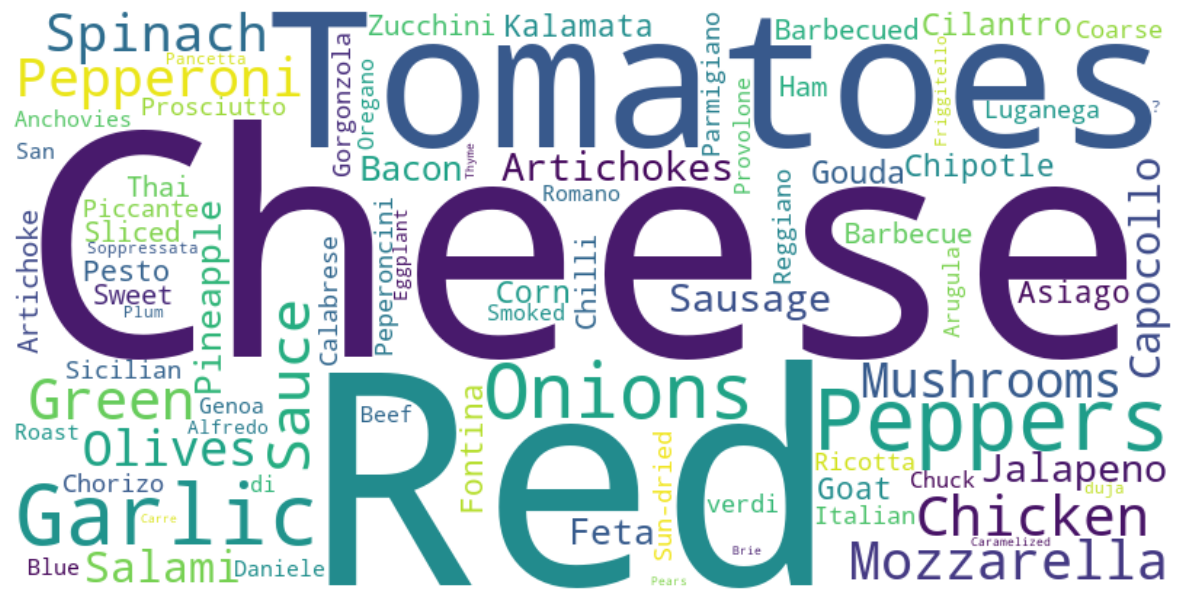

In [123]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk

# Download required NLTK resources (only the first time)
nltk.download('punkt')


# Step 2: Tokenize the ingredients (split into individual words and store in a list)
tokenized_ingredients = []

for ingredients in ingredients_dict_index.values():
    # Tokenize by splitting the ingredients by commas and strip leading/trailing spaces
    tokenized_ingredients.extend([ingredient.strip() for ingredient in ingredients.split(",")])

# Use word_tokenize to tokenize the words
words = []
for ingredient in tokenized_ingredients:
    words.extend(word_tokenize(ingredient))

# Step 3: Calculate word frequencies
word_counter = Counter(words)

# Print the top 10 most common ingredients
print("Top 10 most common ingredients:")
print(word_counter.most_common(10))

# Step 4: Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counter)

# Step 5: Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The output reveals the top 10 most common ingredients found in the pizza dataset, with 'Cheese' being the most frequently used ingredient, appearing 38,751 times. Other popular ingredients include 'Red' (likely from red peppers or onions), 'Tomatoes', 'Peppers', 'Garlic', and 'Onions', all of which feature prominently across different pizza combinations. The high frequency of basic ingredients like 'Cheese', 'Sauce', and 'Mozzarella' indicates that they are foundational to many pizzas, while ingredients like 'Chicken' and 'Garlic' add variety.

This data suggests that traditional pizza toppings are dominant, reflecting customer preferences for classic flavors. The insight gained can help in menu planning, as these frequently used ingredients are central to the most popular pizza offerings. It also highlights potential inventory priorities for high-demand ingredients.

### Report on the Most Common Ingredients:

In analyzing the top 10 most common ingredient combinations, it was found that certain ingredients appear frequently across multiple pizza combos. Ingredients like **Tomatoes**, **Red Peppers**, **Jalapeno Peppers**, **Red Onions**, **Cilantro**, **Corn**, **Chipotle Sauce**, and **Garlic** were consistently present in several combos, such as **Combo_4**, **Combo_19**, and **Combo_167**. This suggests that these ingredients are **highly favored** and likely contribute to the **popularity** of pizzas with a spicy, flavorful profile.

In a separate analysis, the individual **top 10 most common** ingredients were identified. **Cheese** is by far the **most prevalent ingredient**, **appearing 38,751 times**, followed by Red Peppers (35,831), Tomatoes (29,404), and Peppers (28,078). Garlic also ranks highly with 27,422 occurrences. Other ingredients like Onions, Green Peppers, Chicken, and Mozzarella contribute significantly as well. These results highlight the essential role of cheese and peppers in pizza recipes, with garlic and onions providing additional flavor depth, while chicken and mozzarella add texture and richness.

# Build A Random Forest Model

The code scaled_data.isnull().sum() calculates and returns the total number of missing (null) values for each column in the scaled_data DataFrame.

In [171]:
scaled_data.isnull().sum()

month                     0
day                       0
year                      0
weekday                   0
pizza_category_Classic    0
                         ..
minute                    0
second                    0
quantity                  0
unit_price                0
total_price               0
Length: 122, dtype: int64

In [174]:
scaled_data.columns

Index(['month', 'day', 'year', 'weekday', 'pizza_category_Classic',
       'pizza_category_Supreme', 'pizza_category_Veggie', 'pizza_size_M',
       'pizza_size_S', 'pizza_size_XL',
       ...
       'Sliced Ham', 'Soppressata Salami', 'Spinach', 'Tomatoes', 'hour',
       'minute', 'second', 'quantity', 'unit_price', 'total_price'],
      dtype='object', length=122)

The code separates the target variable y (which is the 'total_price' column) from the independent variables X by dropping both 'total_price' and 'unit_price' columns from the scaled_data DataFrame, and then prints the shapes of X and y.

In [185]:
# Separate target variable from independent variables
y = scaled_data['total_price']
X = scaled_data.drop(columns=['total_price','unit_price'])
print(X.shape)
print(y.shape)

(48620, 120)
(48620,)


The code imports necessary modules from sklearn: metrics for model evaluation, train_test_split for splitting the dataset into training and testing sets, cross_val_score for performing cross-validation, and RandomForestClassifier for building a random forest classification model.

In [186]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

The code splits the dataset into training and testing sets, with 75% of the data used for training and 25% for testing, using train_test_split. It also sets a random seed for reproducibility and then prints the shapes of X_train, y_train, X_test, and y_test.








In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36465, 120)
(36465,)
(12155, 120)
(12155,)


## Instantiate a Random Forest Instance

The code initializes a RandomForestRegressor model with 1000 decision trees (n_estimators=1000) and fits the model to the training data (X_train and y_train).

In [188]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000)

In [189]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,  # Feature names from X_train
    'importance': model.feature_importances_  # Feature importance values from the fitted model
})

# Sorting the feature importance in descending order
feature_importances = feature_importances.sort_values(by='importance', ascending=False).reset_index(drop=True)

# Display the result
print(feature_importances)

                                   features    importance
0                              pizza_size_S  3.721825e-01
1                                  quantity  2.936961e-01
2                              pizza_size_M  1.542213e-01
3                                  Tomatoes  2.201413e-02
4                                Prosciutto  1.397794e-02
..                                      ...           ...
115    pizza_name_The Spinach Supreme Pizza  1.931883e-16
116                            Genoa Salami  1.832535e-16
117      pizza_name_The Chicken Pesto Pizza  9.988561e-17
118  pizza_name_The Southwest Chicken Pizza  9.917782e-17
119                                    year  0.000000e+00

[120 rows x 2 columns]


In [190]:
feature_importances.head(20)

,features,importance
0,pizza_size_S,0.372182
1,quantity,0.293696
2,pizza_size_M,0.154221
3,Tomatoes,0.022014
4,Prosciutto,0.013978
5,pizza_name_The Pepperoni Pizza,0.013405
6,pizza_size_XL,0.012807
7,Brie Carre Cheese,0.012650
8,Pears,0.012241
9,Thyme,0.011666


# Feature Importance Report: Impact on Pizza Price
This report analyzes the importance of various features in predicting pizza prices using a RandomForest model. The features include pizza size, ingredients, and specific pizza names, and their relative importance in determining the price is evaluated. The target variable is price, which means we are examining how these factors influence the cost of pizzas.

1. **Highly Important Features**
**Pizza Size S (Importance: 0.372182)**: The **most important feature** in **predicting pizza price** is the size **"Small"**. With an importance of 37.2%, it shows that the **size of the pizza significantly** impacts the price. Smaller pizzas are **likely priced lower**, but the effect of size is **highly prominent in determining the cost**.

**Quantity (Importance: 0.293696)**: **Quantity is the second most influential feature**, contributing nearly 29.4% to the price prediction. This implies that **the number of pizzas ordered is a key driver** in determining the **overall price**. **Larger orders naturally** increase the price, making this a **vital factor**.

**Pizza Size M (Importance: 0.154221)**: The medium-sized pizza also plays a **substantial role, with a 15.4% contribution** to price prediction. Like the small size, **this demonstrates that size remains a critical aspect of pricing decisions**.

2. **Moderately Important Features**
These features have less impact but still play a role in determining the pizza price:

**Tomatoes (Importance: 0.022014)**: As an ingredient, **tomatoes contribute about 2.2% to price prediction**. While it's not as **influential as size**, the **inclusion of tomatoes slightly raises the price**, likely due to its presence in various pizzas.

**Prosciutto (Importance: 0.013978)**: **This premium ingredient contributes 1.4% to the pricing**. **Prosciutto is likely more expensive** than some **other ingredients**, thus **impacting the overall pizza cost**.

**Pizza Name: The Pepperoni Pizza (Importance: 0.013405)**: Specific pizza names, like The Pepperoni Pizza, **add 1.34%** to the price prediction. This suggests that this **type of pizza or its popularity slightly affects the pricing structure**.

**Pizza Size XL (Importance: 0.012807)**: The extra-large pizza size contributes about 1.28% to the price. Although larger pizzas tend to cost more, the model indicates that the size alone isn't as crucial as smaller sizes in this specific dataset.

3. **Low Importance Features**

Features that have minimal influence on predicting the price are largely ingredients and specific pizza names. They contribute very little to the model’s output, but their presence still adds slight variations in pricing.

**Brie Carre Cheese (Importance: 0.012650), Pears (Importance: 0.012241), and Thyme (Importance: 0.011666)** are among the more notable ingredients in terms of their **effect on price**, although **their contributions are still relatively low (~1.2%)**.

**Caramelized Onions (Importance: 0.011274) and Mozzarella Cheese (Importance: 0.008739)**: These popular pizza toppings also contribute minimally to the price, which **might suggest** that **common ingredients do not significantly increase the pizza cost**.

**Pizza Size XXL (Importance: 0.006505)**: The **XXL size has a lower importance** compared to **other sizes**, contributing only **0.65%**. This implies that this **larger size does not have as much of an impact** on price in this dataset, possibly **due to lower demand or sales volume**.

4. **Least Important Features**

These features contribute very little to the price prediction, showing that they are not critical to determining pizza prices:

**Sliced Ham (Importance: 0.006010), Pepperoni (Importance: 0.005687), and Pineapple (Importance: 0.002811)** are **all common** ingredients but have **little effect** on the **final price**. This indicates that **standard toppings** do not **significantly** affect **pricing strategies**.

Pizza Names like **The Hawaiian Pizza (Importance: 0.005915)** and **The Pepperoni, Mushroom, and Pepper Pizza (Importance: 0.003791)** have low importance, indicating that specific pizza types or names do **not heavily influence pricing decisions**.

**Pizza Category: Classic (Importance: 0.003245)**: 

The **"Classic" pizza category contributes** very **little to the price**. This suggests that the **classification of the pizza (e.g., Classic, Specialty)** has **minimal effect** on how **the price is determined**.

**Conclusion**

The **most critical factors** influencing **pizza prices** are **pizza size** and **quantity ordered**, with **smaller sizes (such as "Small" and "Medium")** being especially **influential**. Ingredients and pizza names contribute less to pricing, although **premium ingredients** like **Prosciutto** and **specialty names like The Pepperoni Pizza** have a **modest effect**.

For businesses looking to optimize pricing strategies, **focusing on the impact of size** and **order quantity** will **yield** the **most significant insights**. **Ingredient variation and specific pizza types are less influential** but may still help in **fine-tuning the pricing structure** for **premium** or **specialty pizzas**.

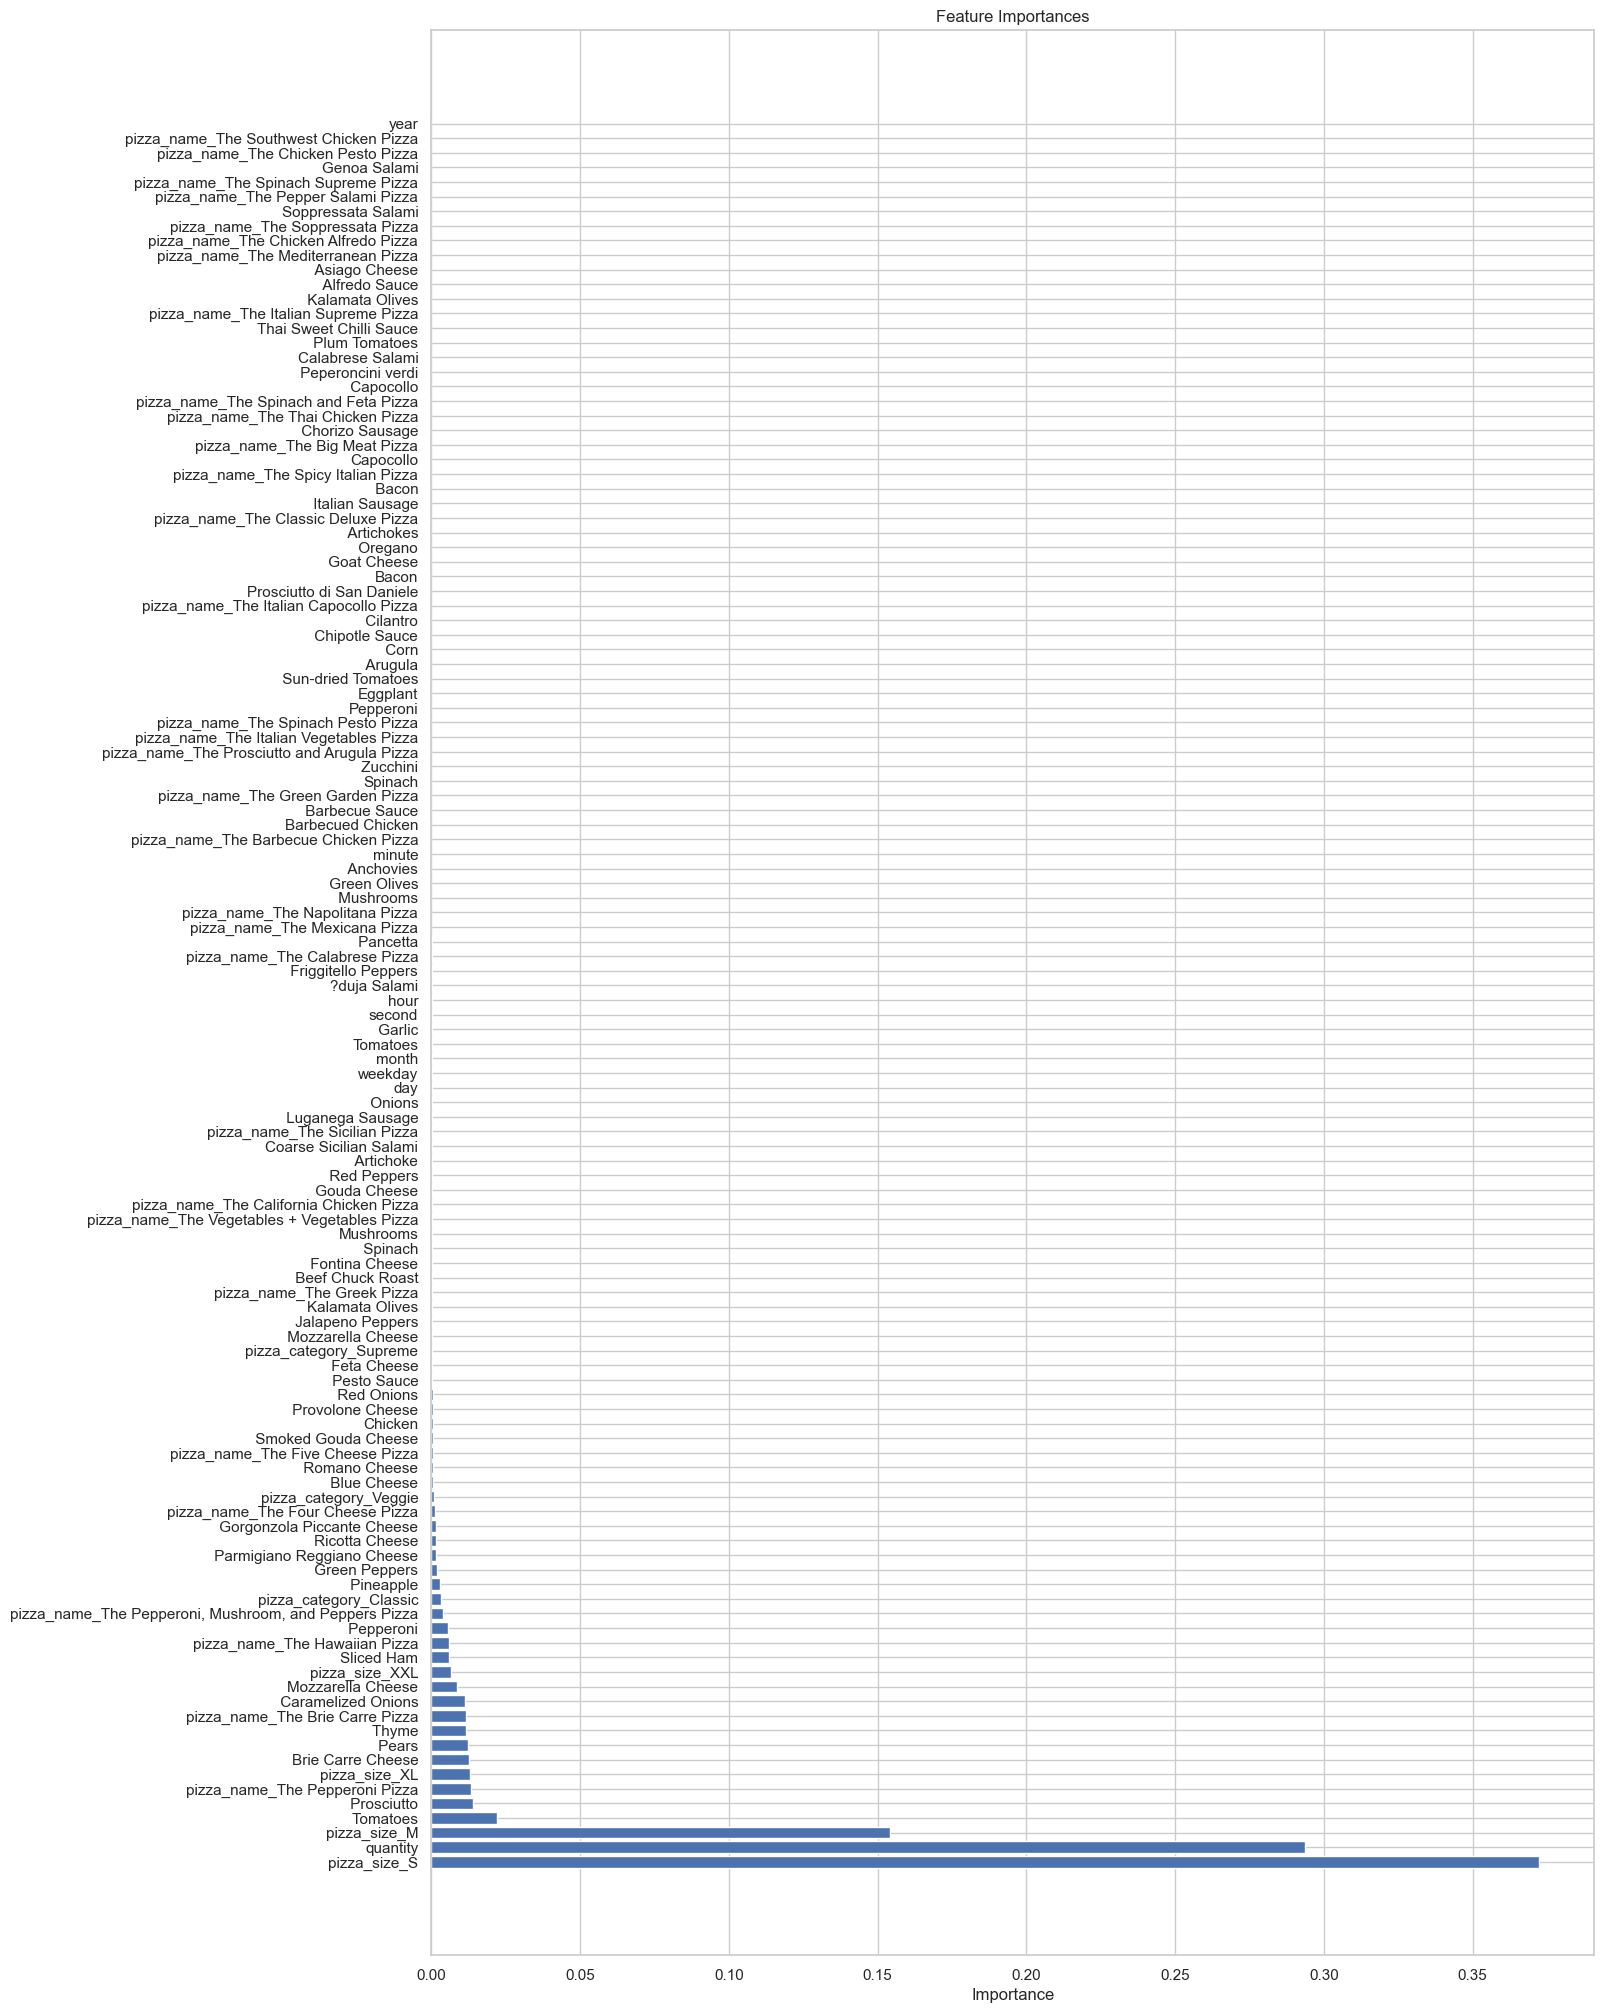

In [191]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [194]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicting the target values for the test set
predictions = model.predict(X_test)

# Calculating regression metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5  # or use sklearn.metrics.mean_squared_error with squared=False
r2 = r2_score(y_test, predictions)

# Printing the metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")



Mean Absolute Error: 4.666763070399604e-05
Mean Squared Error: 3.2686465465783533e-06
Root Mean Squared Error: 0.0018079398625447565
R-squared: 0.9991363123632929


**Model Performance Summary Report**

This report presents the performance evaluation of the RandomForestRegressor model based on key regression metrics. The following metrics were computed to assess the accuracy and reliability of the model in predicting continuous values:

1. **Mean Absolute Error (MAE)**
Value: 
4.67
×
1
0
−
5
4.67×10 
−5
  (or 0.0000467)

**Interpretation**: 

The MAE indicates the average magnitude of the errors in the predictions, without considering their direction. **A very low MAE suggests that**, on average, **the model’s predictions are very close** to the actual values. In this case, the MAE is exceptionally low, **indicating high precision** in the model’s predictions.

2. **Mean Squared Error (MSE)**
Value: 
3.27
×
1
0
−
6
3.27×10 
−6
  (or 0.00000327)

**Interpretation**: 

The MSE measures the average squared difference between predicted and actual values. It penalizes larger errors more heavily. The very low MSE value further reinforces that **the model's predictions are highly accurate**, with minimal error variance.

3. **Root Mean Squared Error (RMSE)**
Value: 0.001808

**Interpretation**: 

The RMSE provides a measure of the standard deviation of the residuals and is expressed in the same units as the target variable. A low RMSE indicates that the model’s predictions are close to the actual values. In this instance, the RMSE is very low, suggesting that the model is performing **exceptionally well** in predicting the target variable with minimal prediction errors.

4. **R-squared (R²) Score**
Value: 0.9991

**Interpretation**: 

The R² score represents the proportion of the variance in the target variable that is predictable from the features. An R² score close to 1 indicates that the model explains nearly all the variability of the target variable. With an R² score of 0.9991, the model demonstrates an outstanding fit, explaining approximately 99.91% of the variance in the target variable.

**Overall Summary**

The RandomForestRegressor model exhibits **excellent performance** across **all evaluated metrics**. The very low MAE, MSE, and RMSE values indicate that the model’s predictions are **highly accurate** with negligible error. The exceptionally high R² score reflects that the model is highly effective in **explaining the variance** in the target variable. These results suggest that the model is **well-suited for the task** and demonstrates high **reliability and precision in its predictions**.

This performance suggests that the model could be used confidently for making accurate predictions in practical applications, provided that the quality and representativeness of the input data remain consistent.






